# Assignment 2 – Kaggle Challenge - Credit Scoring Analysis

> kaggle Team: Oti the Cat

> Team Member: Georgios Markou B00813525, Robin Warrot B00809879, Alexandra Pricop B00806068, Roberto Forner B00803830, Théo Siouffi B00813442, Federico Bianchi B00805255




In this project, we aim to classify bank customers to their Credit Score (Bad, Standard, Good) depending on a plethora of features. In this process, we would like to both achieve the highest accuracy possible, while also understanding and testing multiple machine learning models. To achieve both of our goals, we decided to follow this certain pipeline:

- Understand our independent features, as well as our target variable.
- Prepare and process our dataset.
- Feature Engineering and Feature Selection.
- Machine Learning Models, Hyperparameter tunning, and Evaluation.

We have to note that this pipeline is not a serial process. We needed to adjust different parts of the pipeline multiple times during our analysis. What we present here is the final version of the complete pipeline. We will also include both in the markdown and in the report the different kinds of tests and assumptions we made.

For clarity reasons, as far as the code is concerned, we will only keep the final version.

<b>If you only want to reproduce our BEST SUBMISSION:
- Execute the code of all prior cells to the section [Best Submission Reproduction](#Best-Submission-Reproduction)
- After that execute every cell in that section that will create a .csv file containing our best submission.
- Below this section we continue to explain what we did and how we reached our results.</b>




# Data Loading

- Lets start by taking a look into our data.
- We would first like to check if our data has any missing or duplicate values.

In [ ]:
import pandas as pd
import numpy as np

# Load the training data
train_set_csv = pd.read_csv('train_set.csv')
display(train_set_csv.head())
# Load the test data
test_set_csv = pd.read_csv('test_set.csv')

# Understand shape of data
print(f'Shape: {train_set_csv.shape}')

# Check for duplicates
num_duplicates = train_set_csv.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Check for missing values
num_missing = train_set_csv.isnull().sum().sum()
print(f'Number of missing values: {num_missing}')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard


Shape: (70000, 28)
Number of duplicate rows: 0
Number of missing values: 0


- As we can see the <code>trainset</code> consists of 70000 rows with 28 features and contains no duplicates and missing value.

# Separation of X and Y

Very early in the process, we would like to separate X and Y.
We want to highlight to the reader the fact that the Credit_Score column should be interpreted very differently from the other variables.

In [ ]:
# Extract the feature columns (X)
X = train_set_csv.drop(columns=['Credit_Score'])

# Extract the target column (y)
Y = train_set_csv[['Credit_Score']]

# Data Visualization
The next step needed is to have a better understanding about our data.
To this end, we would like to quickly visualize:
- The distribution of every feature,
- The imbalances and skewness,
- Their impact on the credit score.

We hence created 2 visualization functions.

1) The first visualization function, below, addresses the first 2 points (quickly seeing the distribution and the imbalances and skewness of the data):

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

def plot_columns(df_to_plot):
    """
    Function to plot each column of a dataframe.
    For numerical data: creates a boxplot and histogram.
    For categorical data:
        - Bar chart if less than or equal to 15 categories.
        - Text info about the number of categories if more than 15 categories.

    Parameters:
    df_to_plot: DataFrame
        The dataframe to visualize.
    """

    print(f'\n\nShape of the dataframe: {df_to_plot.shape}\n\n\n')

    # Set the aesthetics for the plots
    sns.set(style="darkgrid")

    # Number of columns for the main grid
    n_cols = 3

    # Adjust the number of rows considering the layout for numerical data
    n_rows = int(np.ceil(len(df_to_plot.columns) / n_cols)) * 2

    # Create grid
    plt.figure(figsize=(15, n_rows * 2))
    grid = gridspec.GridSpec(n_rows, n_cols, figure=plt.gcf(), hspace=1.5, wspace=0.5)

    # Loop through each column in the dataframe
    for i, column in enumerate(df_to_plot.columns):
        # Calculate row index considering the new layout
        row_idx = (i // n_cols) * 2
        col_idx = i % n_cols

        # Numeric data
        if np.issubdtype(df_to_plot[column].dtype, np.number):
            # Nested grid for so that histogram is 7 times higher than boxplot
            nested_grid = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=grid[row_idx:row_idx + 2, col_idx], hspace=0.1)

            # Boxplot
            ax_box = plt.subplot(nested_grid[0])
            sns.boxplot(x=df_to_plot[column], ax=ax_box)
            ax_box.set_title(column, fontsize=16)
            ax_box.set_xlabel('')

            # Histogram
            ax_hist = plt.subplot(nested_grid[1:])
            sns.histplot(df_to_plot[column], bins=30, ax=ax_hist)
            ax_hist.set_title("")
            ax_hist.set_xlabel('')

        else:
            # Categorical data
            if df_to_plot[column].nunique() <= 15:
                # Bar chart
                ax_bar = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                sns.countplot(x=df_to_plot[column], ax=ax_bar)
                ax_bar.set_title(column, fontsize=16)
                ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45)
                ax_bar.set_xlabel('')

            else:
                # Display text information for categories more than 15
                ax_text = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                top_categories = df_to_plot[column].value_counts().head(5)
                text_str = f'Number of categories: {df_to_plot[column].nunique()}\n\nTop 5 categories:\n{top_categories.to_string()}'
                ax_text.text(0.5, 0.5, text_str, ha='center', va='center', fontsize=12)
                ax_text.axis('off')
                ax_text.set_title(column, fontsize=16)

    # Adjust layout to fit everything
    plt.tight_layout()
    plt.show()


Let's use it on X to visualize our 27 features...



Shape of the dataframe: (70000, 27)





<ipython-input-3-5f34f5c59eb8>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


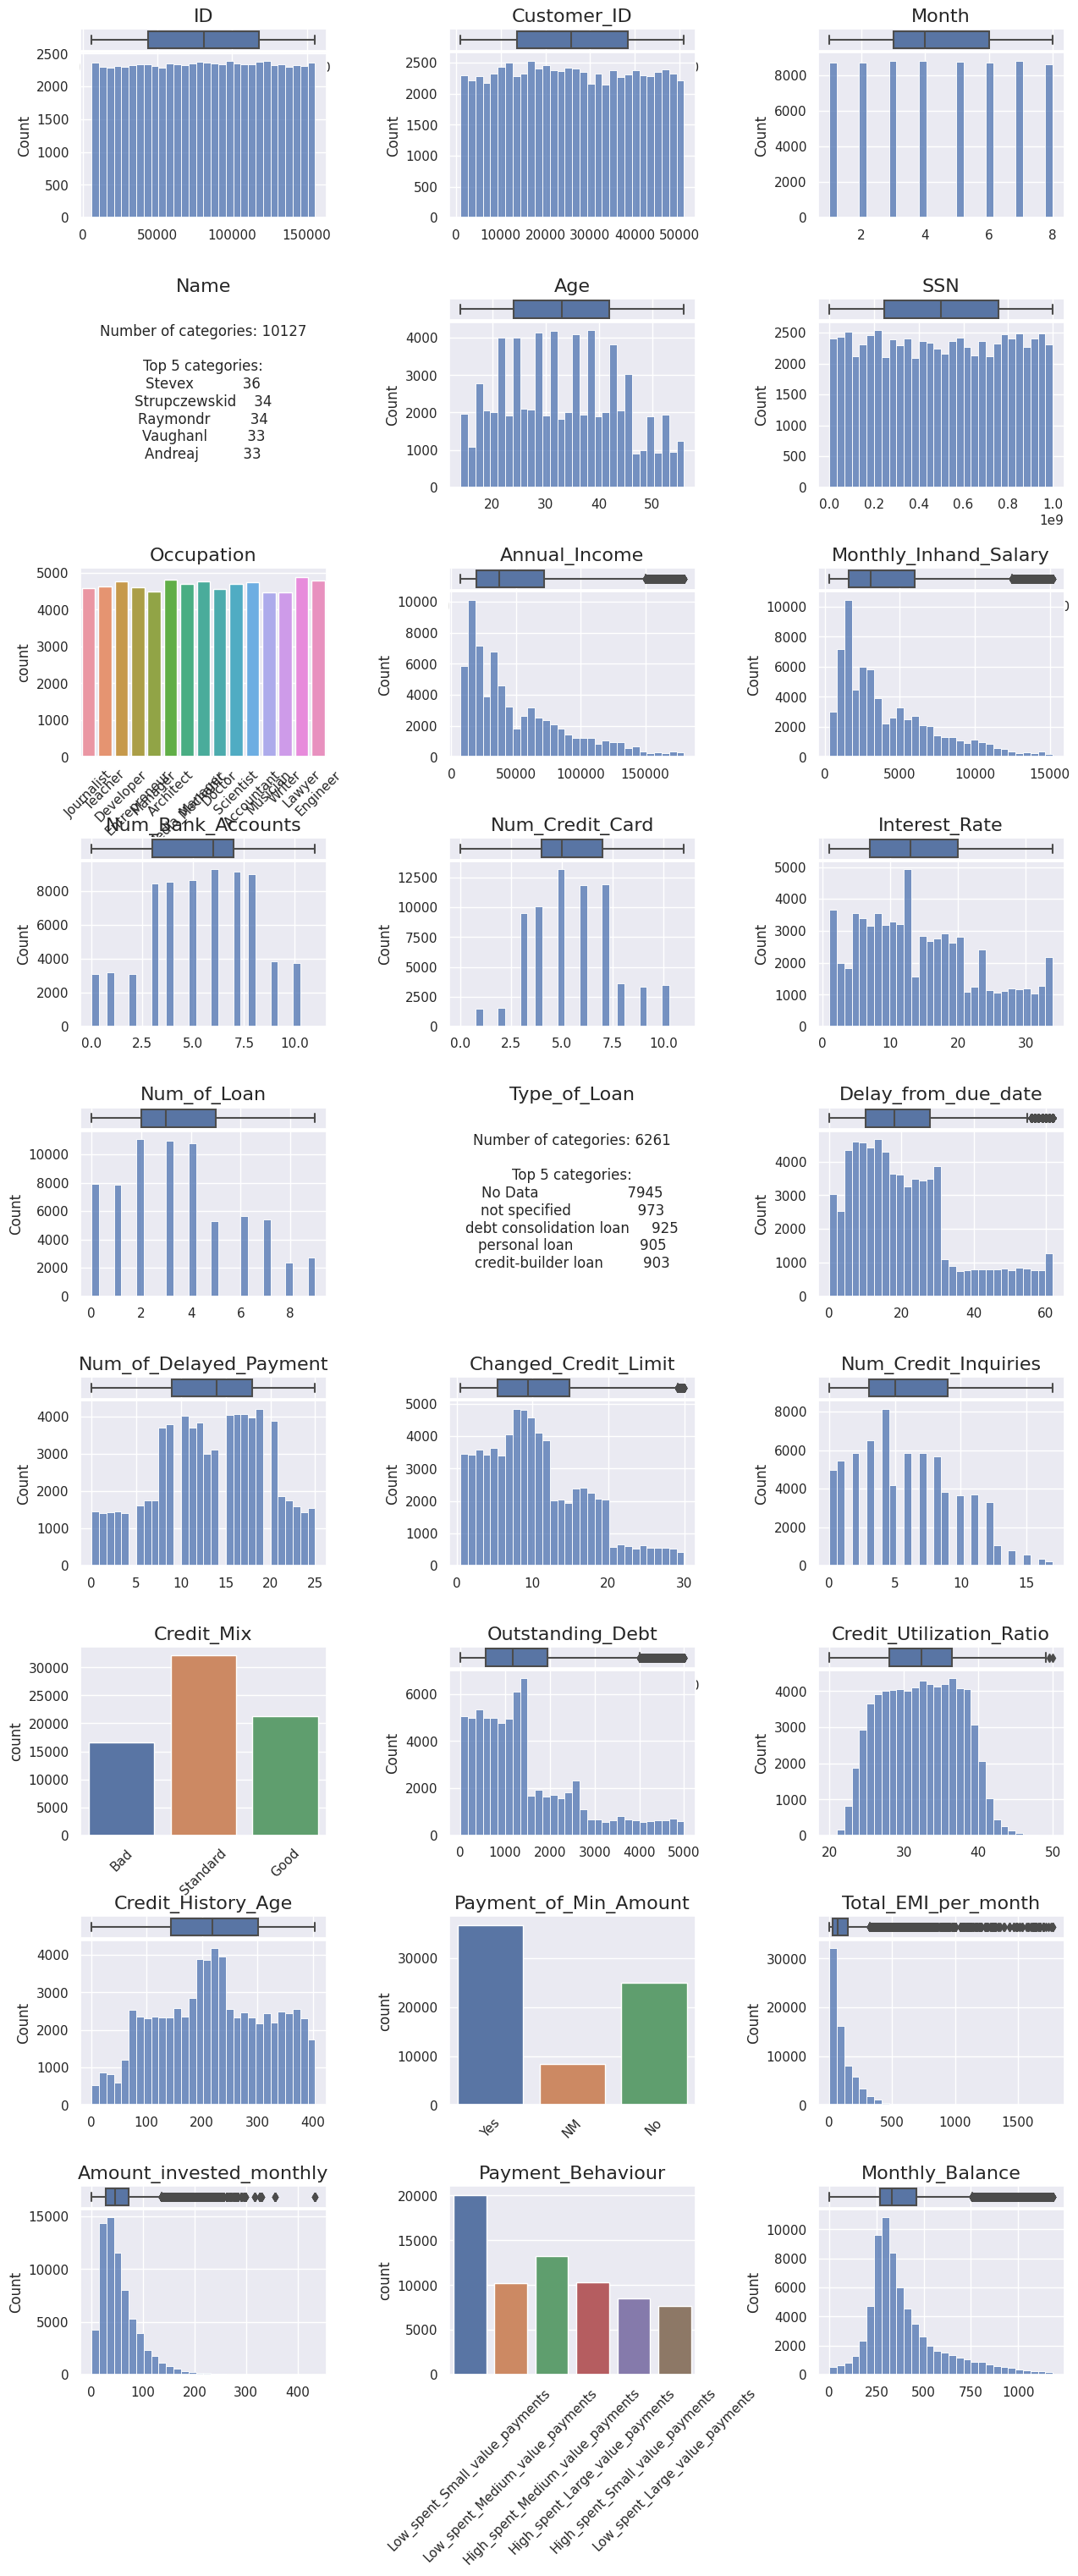

In [ ]:
plot_columns(X)

We discover very interesting insights in our data:


*   Some features are very skewed (Annual_Income, Monthly_Inhand_Salary, Delay from due_date, Total_EMI_per_month...). We shall address those in the following sections.
* Some features are uniformly distributed (SSN, Occupation)



Let's now use it on Y to visualize the distribution of our label to predict.



Shape of the dataframe: (70000, 1)





<ipython-input-3-5f34f5c59eb8>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


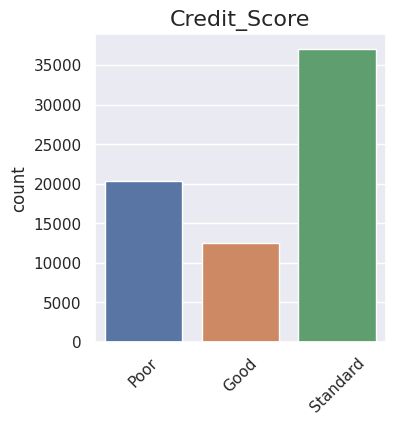

In [ ]:
plot_columns(Y)

We can indeed see a small imbalance in our label to encode, but it should not be a problem in the long run.

2) Now, our second visualization function enables us to visualize quickly the impact of features on the Credit_Score.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

def plot_columns_against_target(df_to_plot, target_variable):
    """
    Function to plot each column of a dataframe against a categorical target variable.
    For numerical data: creates a boxplot and histogram against the target variable.
    For categorical data:
        - Bar chart if less than or equal to 15 categories against the target variable.
        - Text info about the number of categories if more than 15 categories.

    Parameters:
    df_to_plot: DataFrame
        The dataframe to visualize.
    target_variable: str
        The name of the categorical target variable.
    """

    print(f'\n\nShape of the dataframe: {df_to_plot.shape}\n\n\n')

    # Set the aesthetics for the plots
    sns.set(style="darkgrid")

    # Number of columns for the main grid
    n_cols = 3

    # Adjust the number of rows considering the layout for numerical data
    n_rows = int(np.ceil(len(df_to_plot.columns) / n_cols)) * 2

    # Create grid
    plt.figure(figsize=(15, n_rows * 2))
    grid = gridspec.GridSpec(n_rows, n_cols, figure=plt.gcf(), hspace=1.5, wspace=0.5)

    # Loop through each column in the dataframe
    for i, column in enumerate(df_to_plot.columns):
        # Calculate row index considering the new layout
        row_idx = (i // n_cols) * 2
        col_idx = i % n_cols

        # Numeric data
        if np.issubdtype(df_to_plot[column].dtype, np.number):
            # Nested grid for so that histogram is 7 times higher than boxplot
            nested_grid = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=grid[row_idx:row_idx + 2, col_idx], hspace=0.1)

            # Boxplot against the target variable
            ax_box = plt.subplot(nested_grid[0])
            sns.boxplot(x=target_variable, y=df_to_plot[column], data=df_to_plot, ax=ax_box)
            ax_box.set_title(f"{column} vs. {target_variable}", fontsize=16)
            ax_box.set_xlabel('')
            ax_box.set_ylabel('')

            # Histogram against the target variable
            ax_hist = plt.subplot(nested_grid[1:])
            sns.histplot(data=df_to_plot, x=df_to_plot[column], bins=30, hue=target_variable, ax=ax_hist, multiple='stack')
            ax_hist.set_title("")
            ax_hist.set_xlabel('')

        else:
            # Categorical data
            if df_to_plot[column].nunique() <= 15:
                # Bar chart against the target variable
                ax_bar = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                sns.countplot(x=df_to_plot[column], hue=target_variable, data=df_to_plot, ax=ax_bar)
                ax_bar.set_title(f"{column} vs. {target_variable}", fontsize=16)
                ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45)
                ax_bar.set_xlabel('')

            else:
                # Display text information for categories more than 15
                ax_text = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                top_categories = df_to_plot[column].value_counts().head(5)
                text_str = f'Number of categories: {df_to_plot[column].nunique()}\n\nTop 5 categories:\n{top_categories.to_string()}'
                ax_text.text(0.5, 0.5, text_str, ha='center', va='center', fontsize=12)
                ax_text.axis('off')
                ax_text.set_title(f"{column} vs. {target_variable}", fontsize=16)

    # Adjust layout to fit everything
    plt.tight_layout()
    plt.show()

Let's use it on our data (note that we need to give it the non-splitted train set).



Shape of the dataframe: (70000, 28)





<ipython-input-6-d8e1ce9910ad>:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


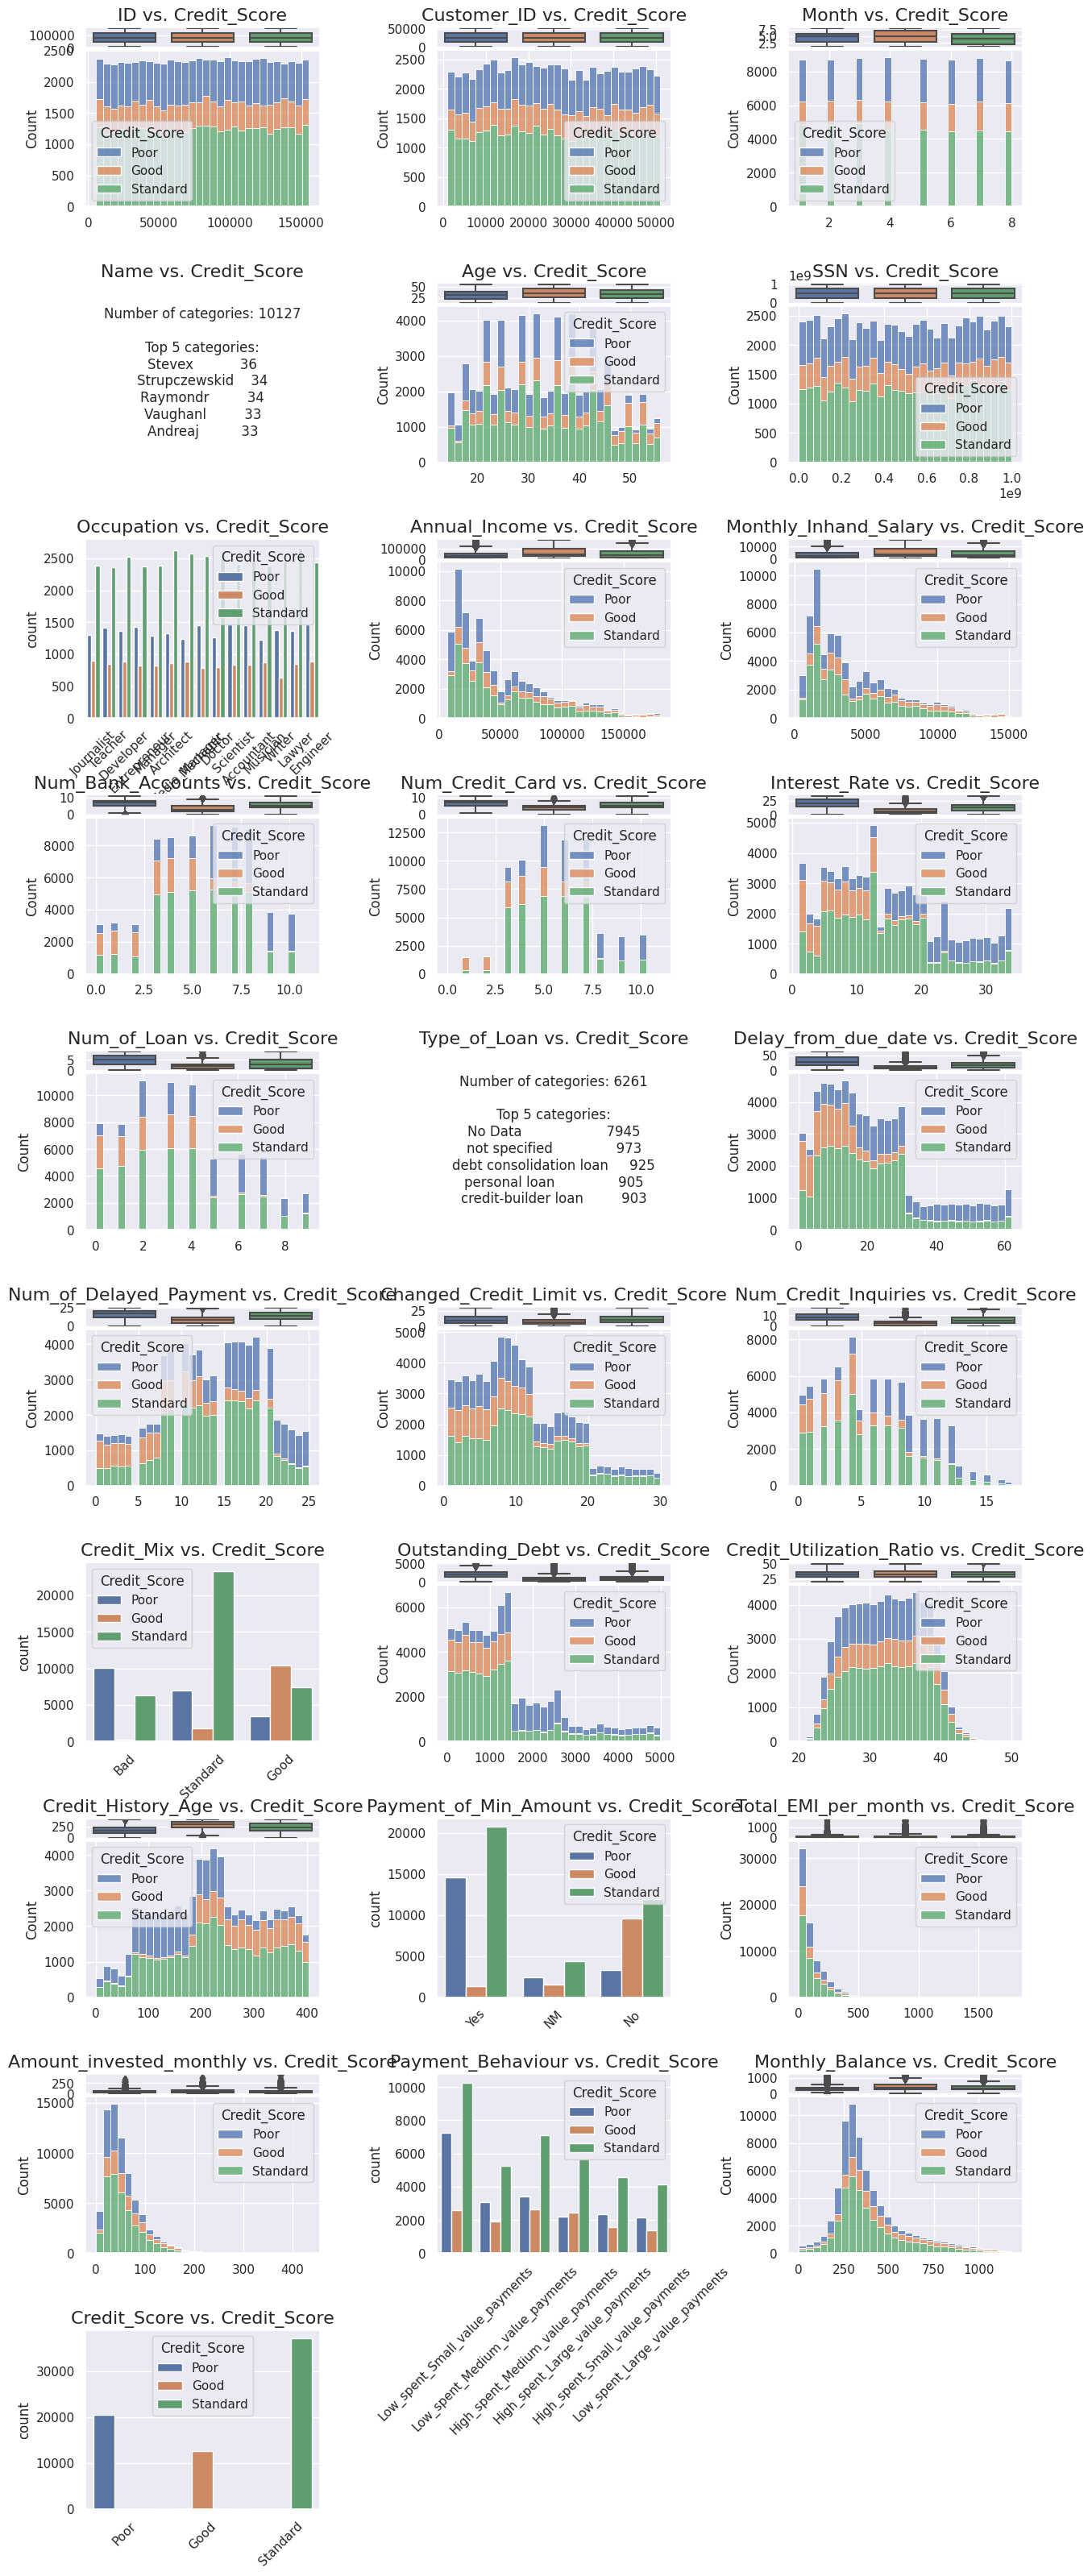

In [ ]:
# Example usage
plot_columns_against_target(train_set_csv,"Credit_Score")

### Observations:

Here, we once again detect very interesting patterns in the data: beyond a certain thresholds, we don't have any "Good" credit score.

Here are the features for which this pattern applies, sorted by when the pattern is the strongest:
- Outstanding debt
- Delay_from_due_date
- Interest rate
- Changed_Credit_Limit

This pattern also applies to a lesser extent to:
- Num_Credit_Inquiries
- Num_credit_card
- Number of loan
- Number of bank accounts

Also, below a certain Credit_History_Age, there are also no "Good" credit scores.

### Based on these observations, we already know that decision tree algorithms might be very good to capture those thresholds components.



# Data Preprocessing
Let's now deep dive on the preprocessing of the data.

This step should be able to take as input (X, Y) and output (X_preprocessed, Y_processed).

To this end, we will apply the following steps:
- Numerical features
  - Outlier Handling (log and sqrt)
  - Normalization
- Categorical variables
  - Encoding (One-Hot, Ordinal, etc)

## Numerical features


## Outlier Handling with Transformations
Let's begin by applying transformations to certain financial features to reduce the impact of outliers.

We use the log transformation and the sqrt transformation, which are effective for skewed data.

In [ ]:
def preprocess_outliers(X):

  # SQRT
  columns_to_sqrt = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']
  for col in columns_to_sqrt:
      insert_index = X.columns.get_loc(col)
      X.insert(insert_index + 1, col + ' (SQRT)', X[col].apply(np.sqrt))
      X.drop(col, axis=1, inplace=True)

  # LOG
  columns_to_log = ['Total_EMI_per_month', 'Amount_invested_monthly']
  for col in columns_to_log:
      insert_index = X.columns.get_loc(col)
      X.insert(insert_index + 1, col + ' (LOG)', X[col].apply(lambda x: np.log(x + 1)))
      X.drop(col, axis=1, inplace=True)

  return X

## Normalization
This step has to come after having applied log and sqrt to make the distributions more normal. Indeed, if we standardize first, the outliers will still have a significant effect on the mean and standard deviation, potentially leading to less effective standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess_normalization(X):
  # Initialize the StandardScaler
  scaler = StandardScaler()

  # Selecting numerical columns
  numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

  # Applying StandardScaler to the numerical columns
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

  return X

## Categorical features
Next, let's encode the categorical variables using different techniques based on the nature of each variable.
These encoding steps are essential for converting categorical data into a format that can be effectively used by various machine learning algorithms.

In this section, for each feature, we are providing:
- A short explanation of the encoding method
- A reason for this choice
- An example
- The code for the encoding


#### Column "Occupation" (One-Hot Encoding)

___

Converted to 15 columns ('Occupation_Journalist', 'Occupation_Teacher'...), with 1 column having a 1 and 14 columns having a 0.

Reason: No natural ordered relationship betweend those categories.

___

**Example:**

|Occupation|
|-|
|"Teacher"|

Is encoded as:

| Occupation_Accountant | Occupation_Architect | Occupation_Developer | Occupation_Doctor | Occupation_Engineer | Occupation_Entrepreneur | Occupation_Journalist | Occupation_Lawyer | Occupation_Manager | Occupation_Mechanic | Occupation_Media_Manager | Occupation_Musician | Occupation_Scientist | Occupation_Teacher | Occupation_Writer |
|-----------------------|----------------------|----------------------|------------------|---------------------|------------------------|---------------------|-----------------|-----------------|--------------------|---------------------------|--------------------|-------------------|------------------|-----------------|
| 0                     | 0                    | 0                    | 0                | 0                   | 0                      | 0                   | 0               | 0               | 0                  | 0                         | 0                  | 0                 | 1                | 0               |


In [ ]:
def encoding_occupation(X):
  # Creating 15 columns 'Occupation_Journalist', 'Occupation_Teacher', ...
  occupation_dummies = pd.get_dummies(X['Occupation'], prefix='Occupation')
  #Adding the columns generated at the right place in the df
  insert_index = X.columns.get_loc('Occupation')
  df_left = X.iloc[:, :insert_index]
  df_right = X.iloc[:, insert_index:]
  X = pd.concat([df_left, occupation_dummies, df_right], axis=1)

  # Drop the original column
  X.drop(['Occupation'], axis=1, inplace=True)
  return X

#### Column "Payment_of_Min_Amount" (One-Hot Encoding)
___

Converted to 2 columns ("Payment_of_Min_Amount_Yes", "Payment_of_Min_Amount_NM"), with at least a 0 in one column.

Reason: No natural ordered relationship betweend those categories.

*Note: The column Payment_of_Min_Amount_No is dropped, as it was redundant with Payment_of_Min_Amount_Yes*

___

**Example:**

| Payment_of_Min_Amount |
| - |
|"No"|

Is encoded as:

|Payment_of_Min_Amount_Yes|Payment_of_Min_Amount_NM|
|-|-|
| 0 | 0 |

In [ ]:
def encoding_payment_of_min_amount(X):

  # Creating 2 columns 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_NM'
  payment_min_amount_dummies = pd.get_dummies(X['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')
  #Adding the columns generated at the right place in the df
  insert_index = X.columns.get_loc('Payment_of_Min_Amount')
  df_left = X.iloc[:, :insert_index]
  df_right = X.iloc[:, insert_index:]
  X = pd.concat([df_left, payment_min_amount_dummies, df_right], axis=1)
  #Drop the column No as it is redundant with Yes
  X.drop('Payment_of_Min_Amount_No', axis=1, inplace=True)

  # Drop the original column
  X.drop(['Payment_of_Min_Amount'], axis=1, inplace=True)
  return X

#### Column "Credit_Mix" (Ordinal Encoding)

___
Converted to 1 column containing either 1, 2 or 3.

Reason: Natural ordered relationship.
___

**Example:**

|Credit_Mix|
|-|
|"Standard"|

Is encoded as:

|Credit_Mix|
|-|
| 2 |

In [ ]:
def encoding_credit_mix(X):

  # Mapping for ordinal encoding
  credit_mix_mapping = {'Bad': 1, 'Standard': 2, 'Good': 3}

  # Applying ordinal encoding
  X['Credit_Mix'] = X['Credit_Mix'].map(credit_mix_mapping)

  return X

#### Column "Payment_Behaviour" (double ordinal encoding)
___

Converted to 2 columns: "Payment_Behaviour_Spent" being either 0 or 1 and "Payment_Behaviour_Value" being either 1, 2 or 3.

Reason: The values of this column are strings that represent 2 ordinal features.
___

**Example:**

|Credit_Score|
|-|
|"High_spent_Medium_value_payments"|

Is encoded as:

|Payment_Behaviour_Spent|Payment_Behaviour_Value|
|-|-|
| 1 |2|

In [ ]:
#PAYMENT_BEHAVIOUR

def mapping_payment_behaviour(value):
    mapping = {
        'Low_spent_Small_value_payments': (0, 1),
        'Low_spent_Medium_value_payments': (0, 2),
        'Low_spent_Large_value_payments': (0, 3),
        'High_spent_Small_value_payments': (1, 1),
        'High_spent_Medium_value_payments': (1, 2),
        'High_spent_Large_value_payments': (1, 3)
    }
    return mapping.get(value)

def encode_payment_behaviour(X):

  # Find the index of the original column
  col_index = X.columns.get_loc('Payment_Behaviour')

  # Vectorize the mapping to new columns
  columns_to_add = list(zip(*X['Payment_Behaviour'].map(mapping_payment_behaviour)))

  # Insert the new columns at the original column's place
  X.insert(col_index, 'Payment_Behaviour_Spent', columns_to_add[0])
  X.insert(col_index + 1, 'Payment_Behaviour_Value', columns_to_add[1])

  # Drop the original column
  X.drop(['Payment_Behaviour'], axis=1, inplace=True)

  return X

#### Column "Type_of_Loan" (Multi-Label One-Hot Encoding)
___
Converted to 10 columns ("Type_of_loan (home equity loan)", "Type_of_Loan (credit-builder loan)"...), including one column "not specified" and one column "no data", where each row can have multiple values 1.

Reason: The values of this column are strings that can specify multiple types of loan that the person has.
___

**Example:**

|Credit_Score|
|-|
|"payday loan,mortgage loan,student loan,not specified,home equity loan"|

Is encoded as:

| Type_of_Loan (home equity loan)       | Type_of_Loan (credit-builder loan)   | Type_of_Loan (auto loan)         | Type_of_Loan (mortgage loan)     | Type_of_Loan (not specified)     | Type_of_Loan (payday loan)       | Type_of_Loan (student loan)     | Type_of_Loan (No Data)          | Type_of_Loan (debt consolidation loan) | Type_of_Loan (personal loan)   |
|--------------------------------------|-------------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|-------------------------------------------|------------------------------|
| 1                                    | 0                                   | 0                                | 1                                | 1                                | 1                                | 1                                | 0                                | 0                                         | 0                            |


In [ ]:
def encode_type_of_loan(X):

  # Split the string on commas and create a list of loan types
  X['Type_of_Loan'] = X['Type_of_Loan'].str.split(',')

  # Identify all unique loan types
  unique_loan_types = set()
  for loan_list in X['Type_of_Loan']:
      unique_loan_types.update(loan_list)

  # Create binary columns for each loan type
  for loan_type in unique_loan_types:
      name_of_new_column = f'Type_of_Loan ({loan_type})'
      new_column = X['Type_of_Loan'].apply(lambda x: 1 if loan_type in x else 0)
      insert_index = X.columns.get_loc("Type_of_Loan")
      X.insert(insert_index, name_of_new_column, new_column)

  # Drop the original column
  X.drop('Type_of_Loan', axis=1, inplace=True)

  return X

## Encoding Y
The encoding of the label to predict, "Credit_Score", will be a bit different from other features, as we wanted to experiment with the


1) One Hot Encoding:

- This method involves representing each credit score category with a unique combination of 0s and 1s.
    For example, our categories - Good, Standard, and Bad - are represented as:
        - Bad: [1, 0, 0]
        - Standard: [0, 1, 0]
        - Good: [0, 0, 1]
    Here, each category is distinctly identified by where the '1' is placed.

2) Ordinal Label Encoding:
- This method assigns a unique number to each category, respecting the order or rank of the categories.
    In our case:
        - Bad is 0
        - Standard is 1
        - Good is 2
    The higher the number, the better the credit score. This method is simpler but still keeps the order.

3) Ordinal Hot Encoding (our new method):
- This approach is a bit more complex. It tries to represent not only the category but also the hierarchy or order within them.
    In our case:
        - Bad is represented as [0, 0], as it doesn't possess the qualities of the other two categories.
        - Standard is encoded as [1, 0], showing it's better than Bad but not as good as Good.
        - Good is represented as [1, 1], implying it has all the qualities of the categories below it and is superior.

The cell below shows the code for all 3 types of encoding.
We will see later that we tested these different components on Neural Networks, but that as they didn't change much in the results, we decided to not use them for other models.

In [ ]:
def encode_Y(Y, encoding_type):

  if encoding_type == "ordinal_label":
    # Mapping for ordinal encoding
    credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
    encoded_Y = pd.DataFrame(Y['Credit_Score'].map(credit_score_mapping).tolist(), index=Y.index)
    encoded_Y.columns = ['Credit_Score_Encoded']

  elif encoding_type == "ordinal_hot":
    # Special mapping for ordinal encoding, see https://stackoverflow.com/questions/38375401/neural-network-ordinal-classification-for-age
    credit_score_mapping = {'Poor': [0, 0], 'Standard': [1, 0], 'Good': [1, 1]}
    encoded_Y = pd.DataFrame(Y['Credit_Score'].map(credit_score_mapping).tolist(), index=Y.index)
    encoded_Y.columns = ['Credit_Score_1', 'Credit_Score_2']

  elif encoding_type == "one_hot":
    # Mapping for one hot encoding
    credit_score_mapping = {'Poor': [1, 0, 0], 'Standard': [0, 1, 0], 'Good': [0, 0, 1]}
    encoded_Y = pd.DataFrame(Y['Credit_Score'].map(credit_score_mapping).tolist(), index=Y.index)
    encoded_Y.columns = ['Credit_Score_1', 'Credit_Score_2', 'Credit_Score_3']

  else:
    print("Wrong encoding asked")

  return encoded_Y.astype(int)

### Piping preprocessing functions

To finish the preprocessing section, let's just encompass everything in one function to be able to execute everything easily.

In [ ]:
def full_preprocess_X(X):

  X = X.copy() # So that the function doesn't change the original X variable

  X = preprocess_outliers(X)
  X = preprocess_normalization(X)
  X = encoding_occupation(X)
  X = encoding_payment_of_min_amount(X)
  X = encoding_credit_mix(X)
  X = encode_payment_behaviour(X)
  X = encode_type_of_loan(X)

  return X

def full_preprocess_Y(Y, encoding_type):
  Y = Y.copy() # So that the function doesn't change the original Y variable

  Y = encode_Y(Y, encoding_type)

  return Y

## Creating the preprocessed sets

Finally, let's create the preprocessed sets, and visualize them.



Shape of the dataframe: (70000, 52)





<ipython-input-3-5f34f5c59eb8>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


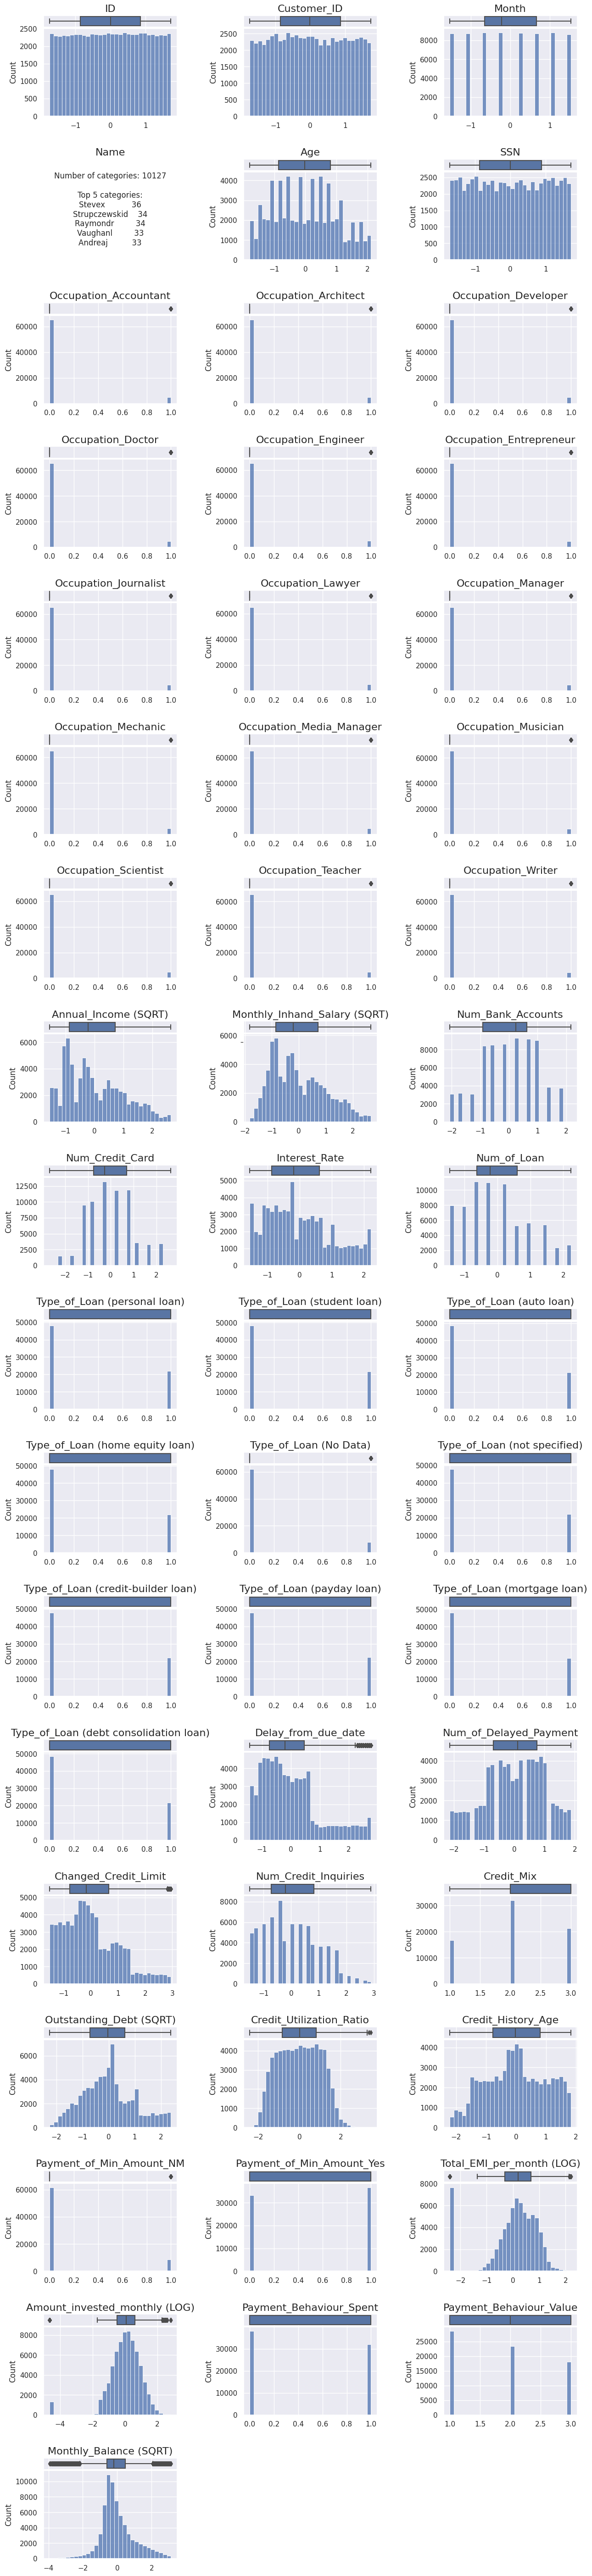



Shape of the dataframe: (70000, 1)





<ipython-input-3-5f34f5c59eb8>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


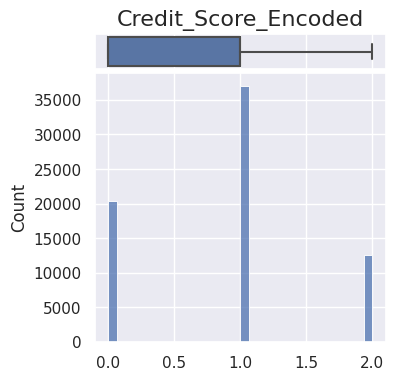

In [ ]:
X_preprocessed = full_preprocess_X(X)
Y_preprocessed = full_preprocess_Y(Y, "ordinal_label")

plot_columns(X_preprocessed)
plot_columns(Y_preprocessed)

- Now, to prepare the following section, what interests us is to determine for each feature its usefulness (strong correlation with the label) and the redundancy (strong correlation with another feature)

- To this end, let's plot a correlation matrix (note that correlation values range from -10 to 10 for easier readability).

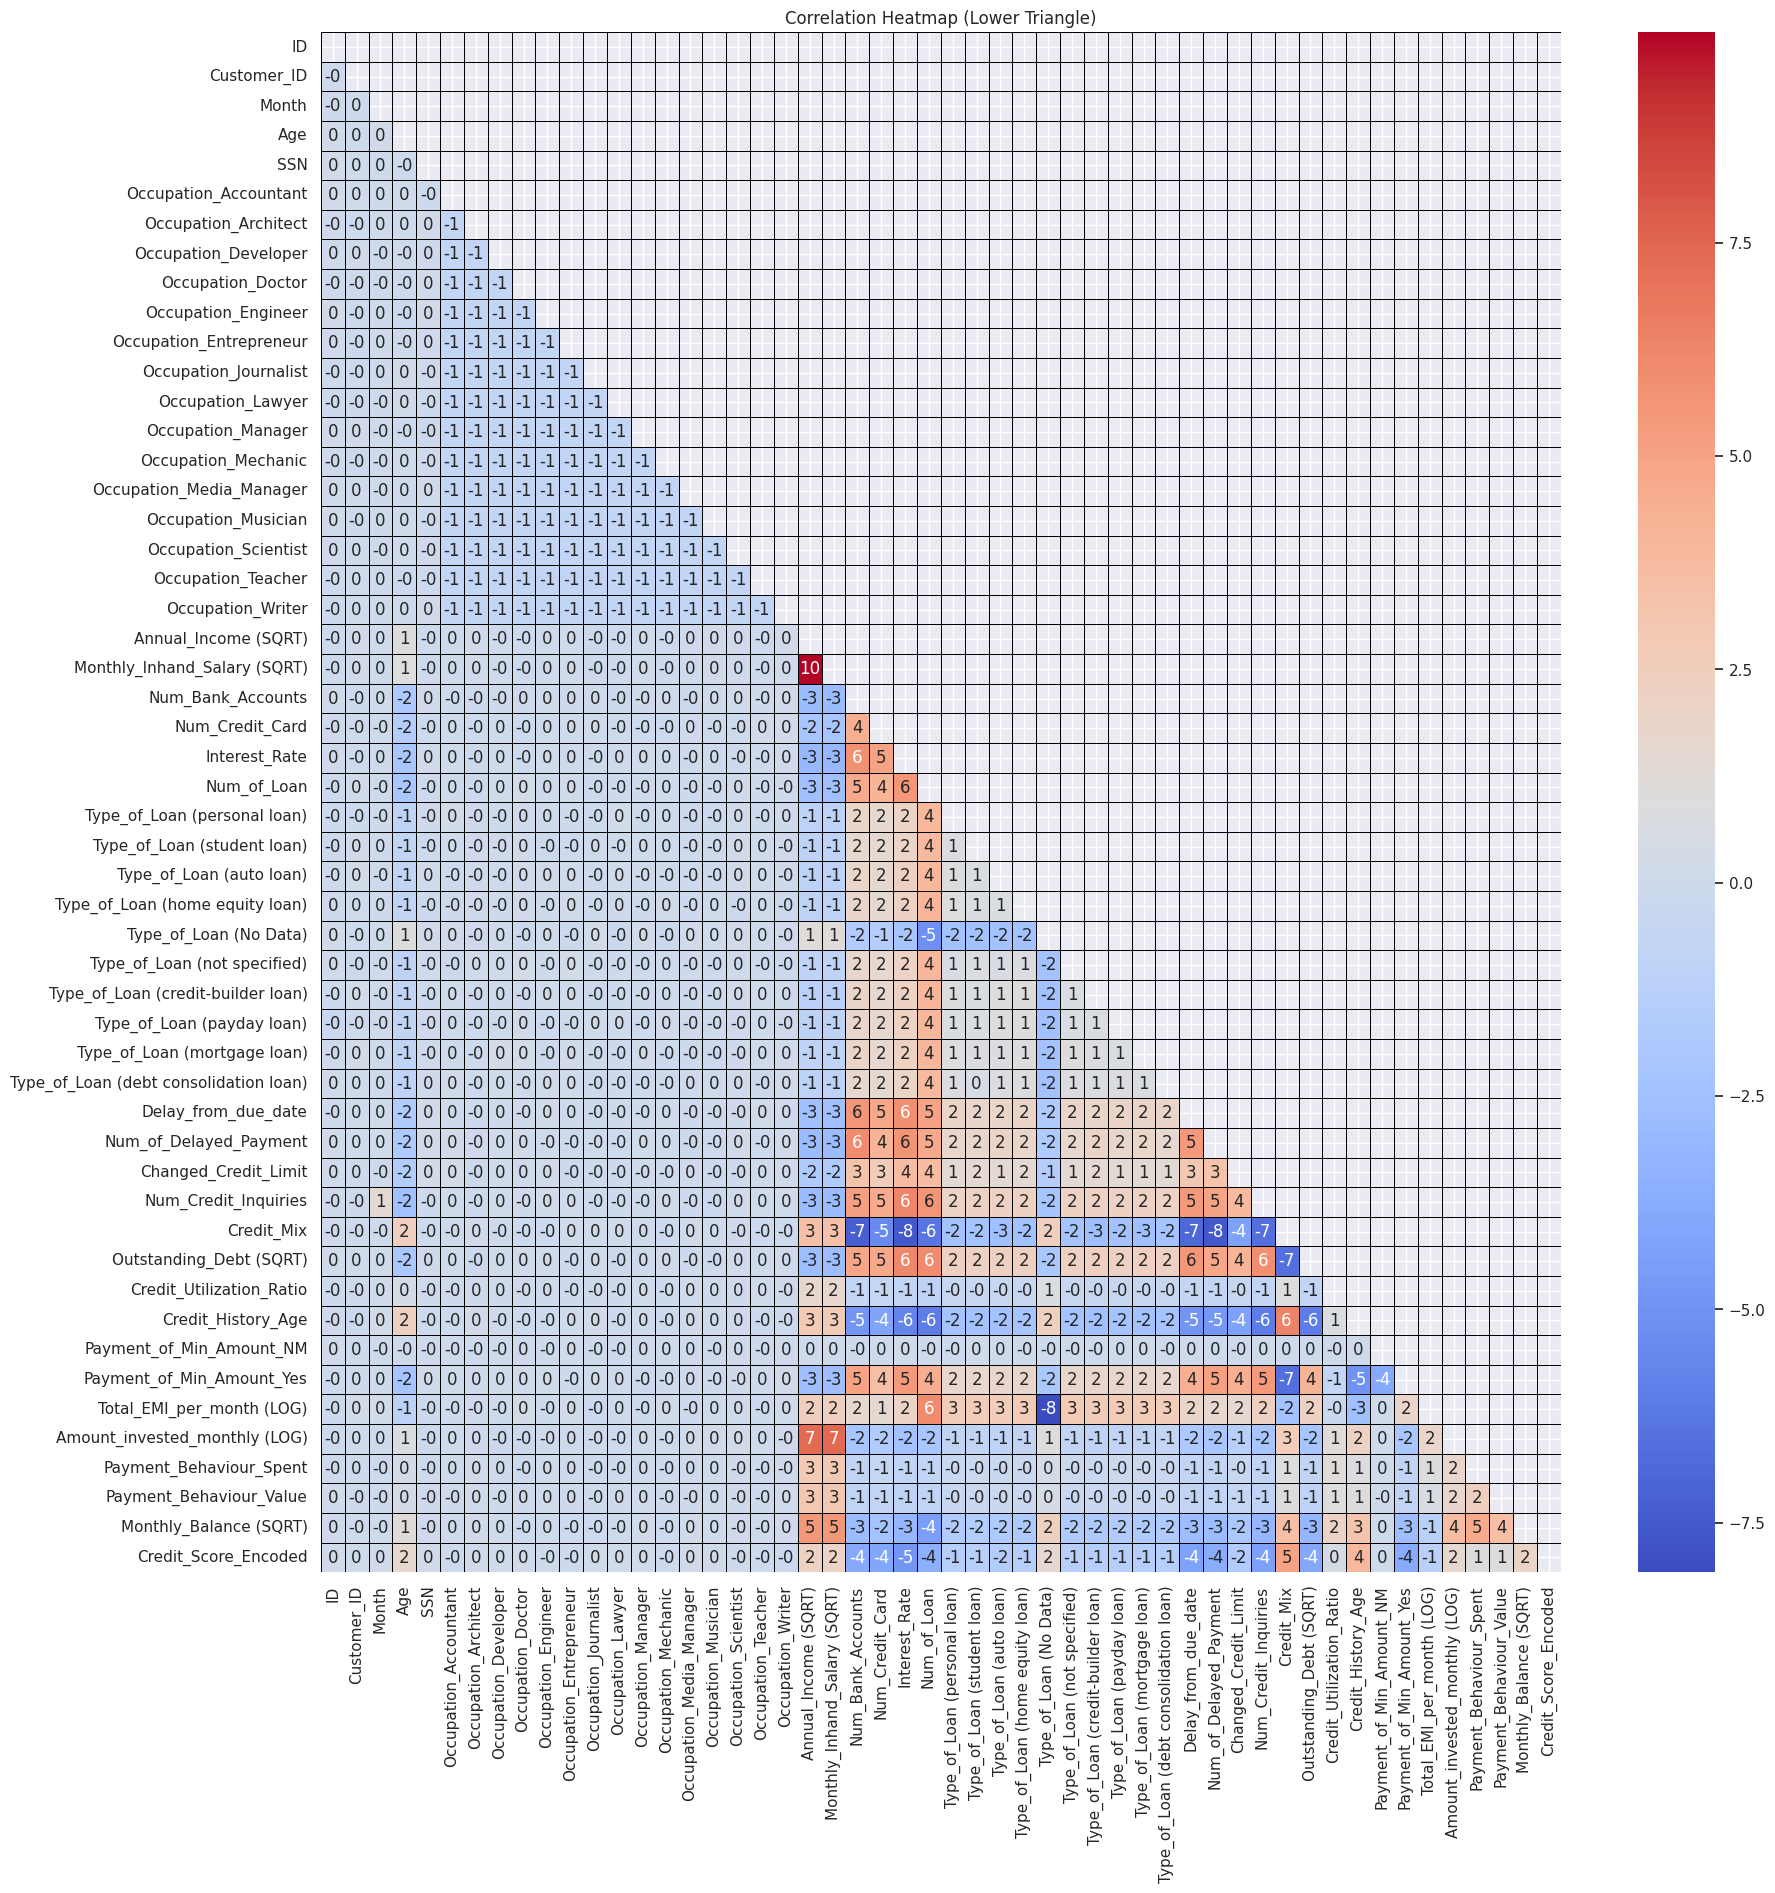

In [ ]:
def compute_correlation(X_preprocessed, Y_preprocessed):
  # Drop features that are not numerical
  X_preprocessed_numerical_columns_only = X_preprocessed.drop("Name", axis=1)

  # Add the 'Credit_Score' column to the numerical features DataFrame
  X_preprocessed_numerical_columns_only = pd.concat([X_preprocessed_numerical_columns_only, Y_preprocessed], axis=1)

  # Compute the correlation matrix
  correlation_df = X_preprocessed_numerical_columns_only.corr()
  return correlation_df

def show_correlation(correlation_df):
  # Generate a mask for the upper triangle (including the diagonal)
  mask = np.triu(correlation_df)

  # Create a heatmap of the correlations
  plt.figure(figsize=(20, 20))
  sns.heatmap(correlation_df*10, mask=mask, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5, linecolor='black')
  plt.title("Correlation Heatmap (Lower Triangle)")
  plt.show()

correlation_df = compute_correlation(X_preprocessed, Y_preprocessed)
show_correlation(correlation_df)

Please note that the last row of this correlation matrix shows the correlation of every feature with the credit score.
---

Now, we get very interesting insights from this correlation matrix! We see that:
- Some features are redundant with other features:
  - Monthly_Inhand_Salary is VERY redundant with Annual_Income.
  - Credit Mix seems to be redundant with a lot of different features.
  - The Amount_Invested seems to be very correlated with the Annual_Income.
  - We can also spot features that are redundant with very niche features: Total_EMI_per_Month seems to be very correlation with No Data in the "Type of Loan" feature.

- Some features are not that useful to predict the credit score:
  - The ID, Customer_ID, SSN, Occupations, and Credit_Utilization ratios seems to not be correlated to the Credit_Score.



HOWEVER, as we will see in the next section, even though Customer_ID seems to not be correlation with the credit score, we might spot something interesting in Customer_ID, and have a VERY different opinion on its usefulness... 😉

# Feature Engineering
- In this Section we are going to experiment with the creation of new Features.
- We see that we have access to the customer_ID.
- This means that for a certain customer we can have access to their past predict scores and actions.

In [ ]:
# We just take a random customer. In this case 1007. Nice Guy.

train_set_csv.query("Customer_ID == 1007")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3252,53255,1007,6,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,35.558388,351.0,No,45.7457,30.373472,Low_spent_Small_value_payments,239.464815,Standard
6814,53253,1007,4,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,37.474952,349.0,No,45.7457,30.373472,High_spent_Medium_value_payments,291.116064,Standard
9790,53250,1007,1,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,35.268983,346.0,No,45.7457,30.373472,High_spent_Medium_value_payments,323.555078,Standard
15909,53252,1007,3,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,30.002612,348.0,No,45.7457,30.373472,Low_spent_Small_value_payments,265.487465,Standard
30508,53256,1007,7,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,40.633156,352.0,No,45.7457,30.373472,Low_spent_Small_value_payments,334.619588,Standard
45688,53251,1007,2,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,37.655638,347.0,No,45.7457,30.373472,High_spent_Medium_value_payments,309.608595,Standard


- The first thing we can see is that for a certain customer, we have access to their <code>Credit_Score</code> almost each month.
- Let's sort the values in ascending order relative to the <code>Month</code>.

In [ ]:
train_set_csv.query("Customer_ID == 1007").sort_values(by="Credit_History_Age")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
9790,53250,1007,1,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,35.268983,346.0,No,45.7457,30.373472,High_spent_Medium_value_payments,323.555078,Standard
45688,53251,1007,2,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,37.655638,347.0,No,45.7457,30.373472,High_spent_Medium_value_payments,309.608595,Standard
15909,53252,1007,3,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,30.002612,348.0,No,45.7457,30.373472,Low_spent_Small_value_payments,265.487465,Standard
6814,53253,1007,4,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,37.474952,349.0,No,45.7457,30.373472,High_spent_Medium_value_payments,291.116064,Standard
3252,53255,1007,6,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,35.558388,351.0,No,45.7457,30.373472,Low_spent_Small_value_payments,239.464815,Standard
30508,53256,1007,7,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,Standard,993.15,40.633156,352.0,No,45.7457,30.373472,Low_spent_Small_value_payments,334.619588,Standard


- We notice that from months 1-7, we are only missing month number 5.
- We should check the <code>test_set.csv</code> for customer number 1007 and understand if this is the rows we have to predict.

In [ ]:
test_set = pd.read_csv("test_set.csv")
test_set.query("Customer_ID == 1007").sort_values(by="Credit_History_Age")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
14173,53254,1007,5,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,1.0,Standard,993.15,35.004320,350.0,No,45.7457,30.373472,Low_spent_Small_value_payments,245.618985
1539,53257,1007,8,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.7425,3.0,...,1.0,Standard,993.15,38.911862,353.0,No,45.7457,30.373472,Low_spent_Small_value_payments,275.386103


- This is very interesting. It seems like our problem can be reformulated to predicting the <code>Credit_Score</code> of customers for which we already have information for different months.
- This will be true if the customers of the test set is a subset of the customers in the training set.

In [ ]:
train_customer = train_set_csv["Customer_ID"].unique()
test_customer = test_set["Customer_ID"].unique()

print("Number of customer in test set", len(test_customer))
print("Number of customer in train set", len(train_customer))

# Check if test_customer is a subset of train_customer
is_subset = set(test_customer).issubset(set(train_customer))

print("Is test_customer a subset of train_customer ? \nAnswer:", is_subset)

Number of customer in test set 11783
Number of customer in train set 12498
Is test_customer a subset of train_customer ? 
Answer: False


In [ ]:
train_customer = set(train_set_csv["Customer_ID"].unique())
test_customer = set(test_set["Customer_ID"].unique())

# Find customers in test_customer but not in train_customer
customers_not_in_train = test_customer - train_customer

print("Customers in test set but not in train set:", customers_not_in_train)


Customers in test set but not in train set: {26830, 10503}


In [ ]:
test_set.query("Customer_ID == 26830 or Customer_ID == 10503 " ).sort_values(by="Credit_History_Age")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
15255,67950,26830,1,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,3.0,Good,878.69,30.483668,206.0,No,38.837685,13.774976,Low_spent_Large_value_payments,270.306151
13325,67951,26830,2,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,3.0,Good,878.69,35.267275,207.0,No,38.837685,13.774976,High_spent_Small_value_payments,283.880491
8791,67952,26830,3,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,4.0,Good,878.69,33.439154,208.0,No,38.837685,13.774976,High_spent_Large_value_payments,334.669636
28564,67953,26830,4,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,4.0,Good,878.69,33.321835,209.0,No,38.837685,13.774976,High_spent_Large_value_payments,351.179839
13098,67954,26830,5,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,4.0,Good,878.69,26.855524,210.0,No,38.837685,13.774976,Low_spent_Medium_value_payments,259.962784
17273,67955,26830,6,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,4.0,Good,878.69,32.356069,211.0,No,38.837685,13.774976,Low_spent_Medium_value_payments,245.226557
28012,67956,26830,7,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,4.0,Good,878.69,35.407279,212.0,No,38.837685,13.774976,Low_spent_Large_value_payments,309.421934
7741,67957,26830,8,Chuck Mikolajczaks,51.0,304310278.0,Manager,19019.10,1637.925000,5.0,...,4.0,Good,878.69,40.231182,213.0,No,38.837685,13.774976,Low_spent_Medium_value_payments,315.413001
23640,59754,10503,1,David Brettc,21.0,868845184.0,Scientist,14125.04,1202.086667,5.0,...,0.0,Good,446.31,37.209934,214.0,NM,14.539656,21.486689,Low_spent_Small_value_payments,303.459716
18531,59755,10503,2,David Brettc,21.0,868845184.0,Scientist,14125.04,1202.086667,5.0,...,0.0,Good,446.31,31.603370,215.0,No,14.539656,21.486689,High_spent_Small_value_payments,344.182321


- So in the end, we don't have information about only two clients in the whole dataset (16 rows out of 30000).
- This information completely changes the problem and how we can solve it.
- We can create new features that accurately represent a customer with their <code>Credit_Score</code> using historical Data.
- If we do not have access to the historicall data, we can still train another model that does not take this facts into account, and tries to predict the label for this specific customers.

Let's create new metrics to capture these insights...

## Mean Credit Score
- The simplest usage of the historical data for each customer is to calculate their mean Credit_Score from all their previous and future months.
- This idea works in practice since there is not much fluctuations between the credit_scores of a specific client.


In [ ]:
# Take our preprocessed dataset and add the mean_credit_score variable.

def mean_credit_scores(X_preprocessed):

    pre_process_train_set = X_preprocessed.copy()
    pre_process_train_set["Credit_Score"] = Y_preprocessed["Credit_Score_Encoded"]
    mean_credit_scores = pre_process_train_set[["Credit_Score","Customer_ID"]].groupby("Customer_ID").mean().reset_index()
    mean_credit_scores.rename(columns={"Credit_Score":"Mean_Credit_Score"},inplace=True)
    pre_process_train_set = pd.merge(pre_process_train_set, mean_credit_scores, on='Customer_ID', how='left')
    pre_process_train_set.drop(["Credit_Score"], axis=1,inplace=True)
    return pre_process_train_set

- The main problem with this idea is that it acutally uses the label to predict the label, since the <mean_credit_score> also takes into account all credit scores of the client.

## Exponential Centered Moving Average Credit Score

- Following the same idea we also created a more complex credit score variable that **increases the importance of credit scores close to the predicted value**.

For example: if we want to predict the credit_score of the month 5, we assume that months 4 and 6 should be greater predictors than months 3 and 7.

It's important to remember that when we're calculating for a particular month, we don't actually use the credit score from that specific month. Instead, we rely on the credit scores from the surrounding months. The reason for this approach is quite straightforward. In our test set, we don't have access to the credit scores for the months we are interested in, so we can't use them directly in our calculations. Instead, we use the available credit scores from adjacent months that are included in our training set. This method helps us make informed estimates even when the exact data for a specific month isn't available.

In [ ]:
def calculate_EMA_credit_score(current_month, df_data_on_one_customer, weight_pattern):
    # Convert DataFrame to NumPy array
    data_array = df_data_on_one_customer.to_numpy()

    # Define column indices for ease of access
    month_col_index = df_data_on_one_customer.columns.get_loc("Month")
    credit_score_col_index = df_data_on_one_customer.columns.get_loc("Credit_Score_Encoded")

    # Filter out rows with the current month
    data_array = data_array[data_array[:, month_col_index] != current_month]

    # Initialize the weight list
    weight = weight_pattern

    # Calculate weights to apply and weighted credit scores
    weighted_scores = []
    sum_of_relevant_weights = 0

    for row in data_array:
        month = row[month_col_index]
        credit_score = row[credit_score_col_index]
        weight_for_month = weight[7 + (month - current_month)]

        if weight_for_month != -99: #IMPORTANT: the -99 value in the weight list is a dummy value that corresponds to the fact that the current_month shouldn't be taken into account for the calculation of the EMA (which would else be "cheating")
            weighted_score = credit_score * weight_for_month
            weighted_scores.append(weighted_score)
            sum_of_relevant_weights += weight_for_month

    # Calculate the sum of products
    sum_of_products = sum(weighted_scores)

    # Calculate and return the EMA credit score
    EMA_credit_score = sum_of_products / sum_of_relevant_weights if sum_of_relevant_weights != 0 else 0

    return EMA_credit_score


def calculate_EMA_credit_score_group(df_data_on_one_customer, weight_pattern):

    customer_ID = df_data_on_one_customer.name #Since it's grouped by Customer_ID

    df_data_on_one_customer = df_data_on_one_customer.copy()

    #Calculate ema credit_scores for 8 months
    ema_credit_scores = [calculate_EMA_credit_score(month, df_data_on_one_customer, weight_pattern) for month in range(1, 9)]

    CustomerID_Month_EMA = {
        'Customer_ID': customer_ID,
        'Month': list(range(1, 9)),
        'EMA': ema_credit_scores
    }

    CustomerID_Month_EMA_df = pd.DataFrame(CustomerID_Month_EMA)

    return CustomerID_Month_EMA_df


def add_column_credit_score_exponential_moving_average(X_preprocessed, weight_pattern=[0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, -99, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]):
  # NOTE: X_preprocessed can be either coming from Train_csv or Test_csv

  # Take the train_set and encode column Y
  train_set_csv_label_encoded = pd.concat([X, Y_preprocessed], axis=1)
  train_set_csv_label_encoded['Credit_Score_Encoded'] = train_set_csv_label_encoded['Credit_Score_Encoded'].astype('Int64')

  # Creating the new column
  CustomerID_Month_EMA_df = train_set_csv_label_encoded.groupby("Customer_ID", group_keys=False)[["Month", "Credit_Score_Encoded"]].apply(lambda group: calculate_EMA_credit_score_group(group, weight_pattern))

  #Just add the new column to X_preprocess
  if len(X_preprocessed) == 70000: #IF TRAIN
    train_set_unprocessed_with_column = pd.merge(train_set_csv[['ID', 'Customer_ID', 'Month']], CustomerID_Month_EMA_df, on=['Customer_ID', 'Month'], how='left')
    X_preprocessed['EMA'] = train_set_unprocessed_with_column['EMA']

  if len(X_preprocessed) == 30000: #IF TEST
    test_set_unprocessed_with_column = pd.merge(test_set_csv[['ID', 'Customer_ID', 'Month']], CustomerID_Month_EMA_df, on=['Customer_ID', 'Month'], how='left')
    X_preprocessed['EMA'] = test_set_unprocessed_with_column['EMA']

  # As described just above, a few amount of customers don't have any data in train_set.
  # So we just fill with 1's, as it's a middle value AND the most popular value.
  X_preprocessed['EMA'].fillna(1, inplace=True)

  return X_preprocessed

#display(add_column_credit_score_exponential_moving_average(X_preprocessed))

- We then tuned this new feature by generating different exponential patterns, and keeping the pattern that creates the highest correlation with "Credit_Score".

We commented out the code as it takes a few minutes to run.

The best weight pattern found is:
[0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, -99, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]

In [ ]:
# # Creating a function that generates multiple patterns
# def generate_weight_patterns():

#     # Creating 10 base values to create the patterns from
#     base_values = [x / 10.0 for x in range(1, 10)]
#     pattern_length = 15

#     #Generating the patterns based on the base values
#     patterns = []
#     for base in base_values:
#         pattern = [round(base ** (abs(i - (pattern_length // 2))), 7) for i in range(pattern_length)]
#         pattern[pattern_length // 2] = -99  # Inserting -99 at the central position, as described in the EMA function.
#         patterns.append(pattern)
#     return patterns

# # Creating multiple base values
# weight_patterns = generate_weight_patterns()
# for weight_pattern in weight_patterns:
#   X_pattern = add_column_credit_score_exponential_moving_average(X_preprocessed, weight_pattern)
#   correlation = X_pattern['EMA'].corr(Y_preprocessed['Credit_Score_Encoded'])
#   print(f'Correlation with weight_pattern {weight_pattern}: {correlation}')

# # Best weight_pattern:
# #[0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, -99, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]

Let's now inspect the behaviour of this feature on one customer:

In [ ]:
# Adding the new column
TEST_X_preprocessed_with_EMA = add_column_credit_score_exponential_moving_average(X_preprocessed)

# Merging the encoded credit score from Y_preprocessed with the test dataset.
TEST_X_preprocessed_with_EMA["Credit_Score"] = Y_preprocessed["Credit_Score_Encoded"]

# Adding the 'Month' column from the original dataset X to the test dataset for reference.
TEST_X_preprocessed_with_EMA["Month"] = X["Month"]

# Sorting the data & selecting only some columns for each of read
TEST_X_preprocessed_with_EMA = TEST_X_preprocessed_with_EMA.sort_values(by=["Customer_ID", "Month"])
TEST_X_preprocessed_with_EMA = TEST_X_preprocessed_with_EMA[["Name", "Month", "Credit_Score", "EMA"]]

# Display on one example
display(TEST_X_preprocessed_with_EMA[TEST_X_preprocessed_with_EMA['Name'] == "Natalie Thomasp"])

,Name,Month,Credit_Score,EMA
2209,Natalie Thomasp,1,1,0.974790
39944,Natalie Thomasp,2,1,0.965517
20006,Natalie Thomasp,3,1,0.936170
36410,Natalie Thomasp,4,1,0.857143
30895,Natalie Thomasp,6,1,0.384615
65657,Natalie Thomasp,7,0,0.594937
24820,Natalie Thomasp,8,0,0.423423


Even though this feature doesn't have access to the credit score of the current month, it's doing really good at "predicting" what its credit score is!

---
But there is a curious case!! Why does the function predict a value closer to 0 for month 6, when we might expect it to be 1??

 We will see that it's actually the best educated guess:

  - As we don't have access to data for month 5, the algorithm has to rely on the credit scores from months 1 to 4 and 7 to 8 (note that it obviously can't use the credit score for month 6 itself).
  - Since past months (1 to 4) were 1, and future months (7 and 8) will shift to 0, we observe a downwards trend shifting between month 5 or 6. So the values of months 5 and 6 should be either:
    - Month 5 is 1 / month 6 is 1
    - Month 5 is 1 / month 6 is 0
    - Month 5 is 0 / month 6 is 0
  - Hence, since we don't have more information, our best educated guess is to put 0, as in 2 cases out of 3 it should be 0!

### Note on new feature creation
Interestingly enough, the "Mean" feature can be thought of a special case of the "Exponential Centered Moving Average", where the weights [1, 1, 1, 1, 1, 1, -99, 1, 1, 1, 1, 1, 1] (signifying that we put equal emphasis on every data).

## Feature Selection
Now that we created all the features we need, it is time to select the ones we want to use for our models.

### Creating the sets with selected features
Here, the function is very straightforward: we just comment out the features that we don't want to use, and the function automatically creates X_feature engineered with only the selected columns.

In [ ]:
def feature_engineer_X(X_preprocessed):

  columns_X_to_train_on = [
                          #'ID',
                          'Customer_ID',
                          'Month',
                          #'Name',
                          'Age',
                          'SSN',
                          'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher','Occupation_Writer',
                          #'Annual_Income (SQRT)', #redundant with Monthly_Inhand_Salary
                          'Payment_of_Min_Amount_NM',
                          'Payment_of_Min_Amount_Yes',
                          'Monthly_Inhand_Salary (SQRT)',
                          'Num_Bank_Accounts',
                          'Num_Credit_Card',
                          'Interest_Rate',
                          'Num_of_Loan',
                          'Type_of_Loan (mortgage loan)', 'Type_of_Loan (not specified)', 'Type_of_Loan (auto loan)', 'Type_of_Loan (payday loan)', 'Type_of_Loan (debt consolidation loan)', 'Type_of_Loan (personal loan)', 'Type_of_Loan (home equity loan)', 'Type_of_Loan (student loan)', 'Type_of_Loan (credit-builder loan)', 'Type_of_Loan (No Data)',
                          'Delay_from_due_date',
                          'Num_of_Delayed_Payment',
                          'Changed_Credit_Limit',
                          'Num_Credit_Inquiries',
                          'Credit_Mix',
                          'Outstanding_Debt (SQRT)',
                          'Credit_Utilization_Ratio',
                          'Credit_History_Age',
                          'Total_EMI_per_month (LOG)',
                          'Amount_invested_monthly (LOG)',
                          'Payment_Behaviour_Spent',
                          'Payment_Behaviour_Value',
                          'Monthly_Balance (SQRT)'
                          ]

  # Returning the actual columns of X
  X_feature_engineered = X_preprocessed.copy()

  #Getting new features
  X_feature_engineered = add_column_credit_score_exponential_moving_average(X_feature_engineered)

  # Select features
  X_feature_engineered = X_feature_engineered[columns_X_to_train_on + ["EMA"]] #DON'T FORGET TO KEEP NEW FEATURES

  return X_feature_engineered


def feature_engineer_Y(Y_preprocessed):
  Y_feature_engineered = Y_preprocessed.copy()

  Y_feature_engineered = Y_preprocessed #nothing applied for now

  return Y_feature_engineered


## Understanding correlation of features with the Credit_Score

We now would like to make a last check of the correlation of features that we selected:

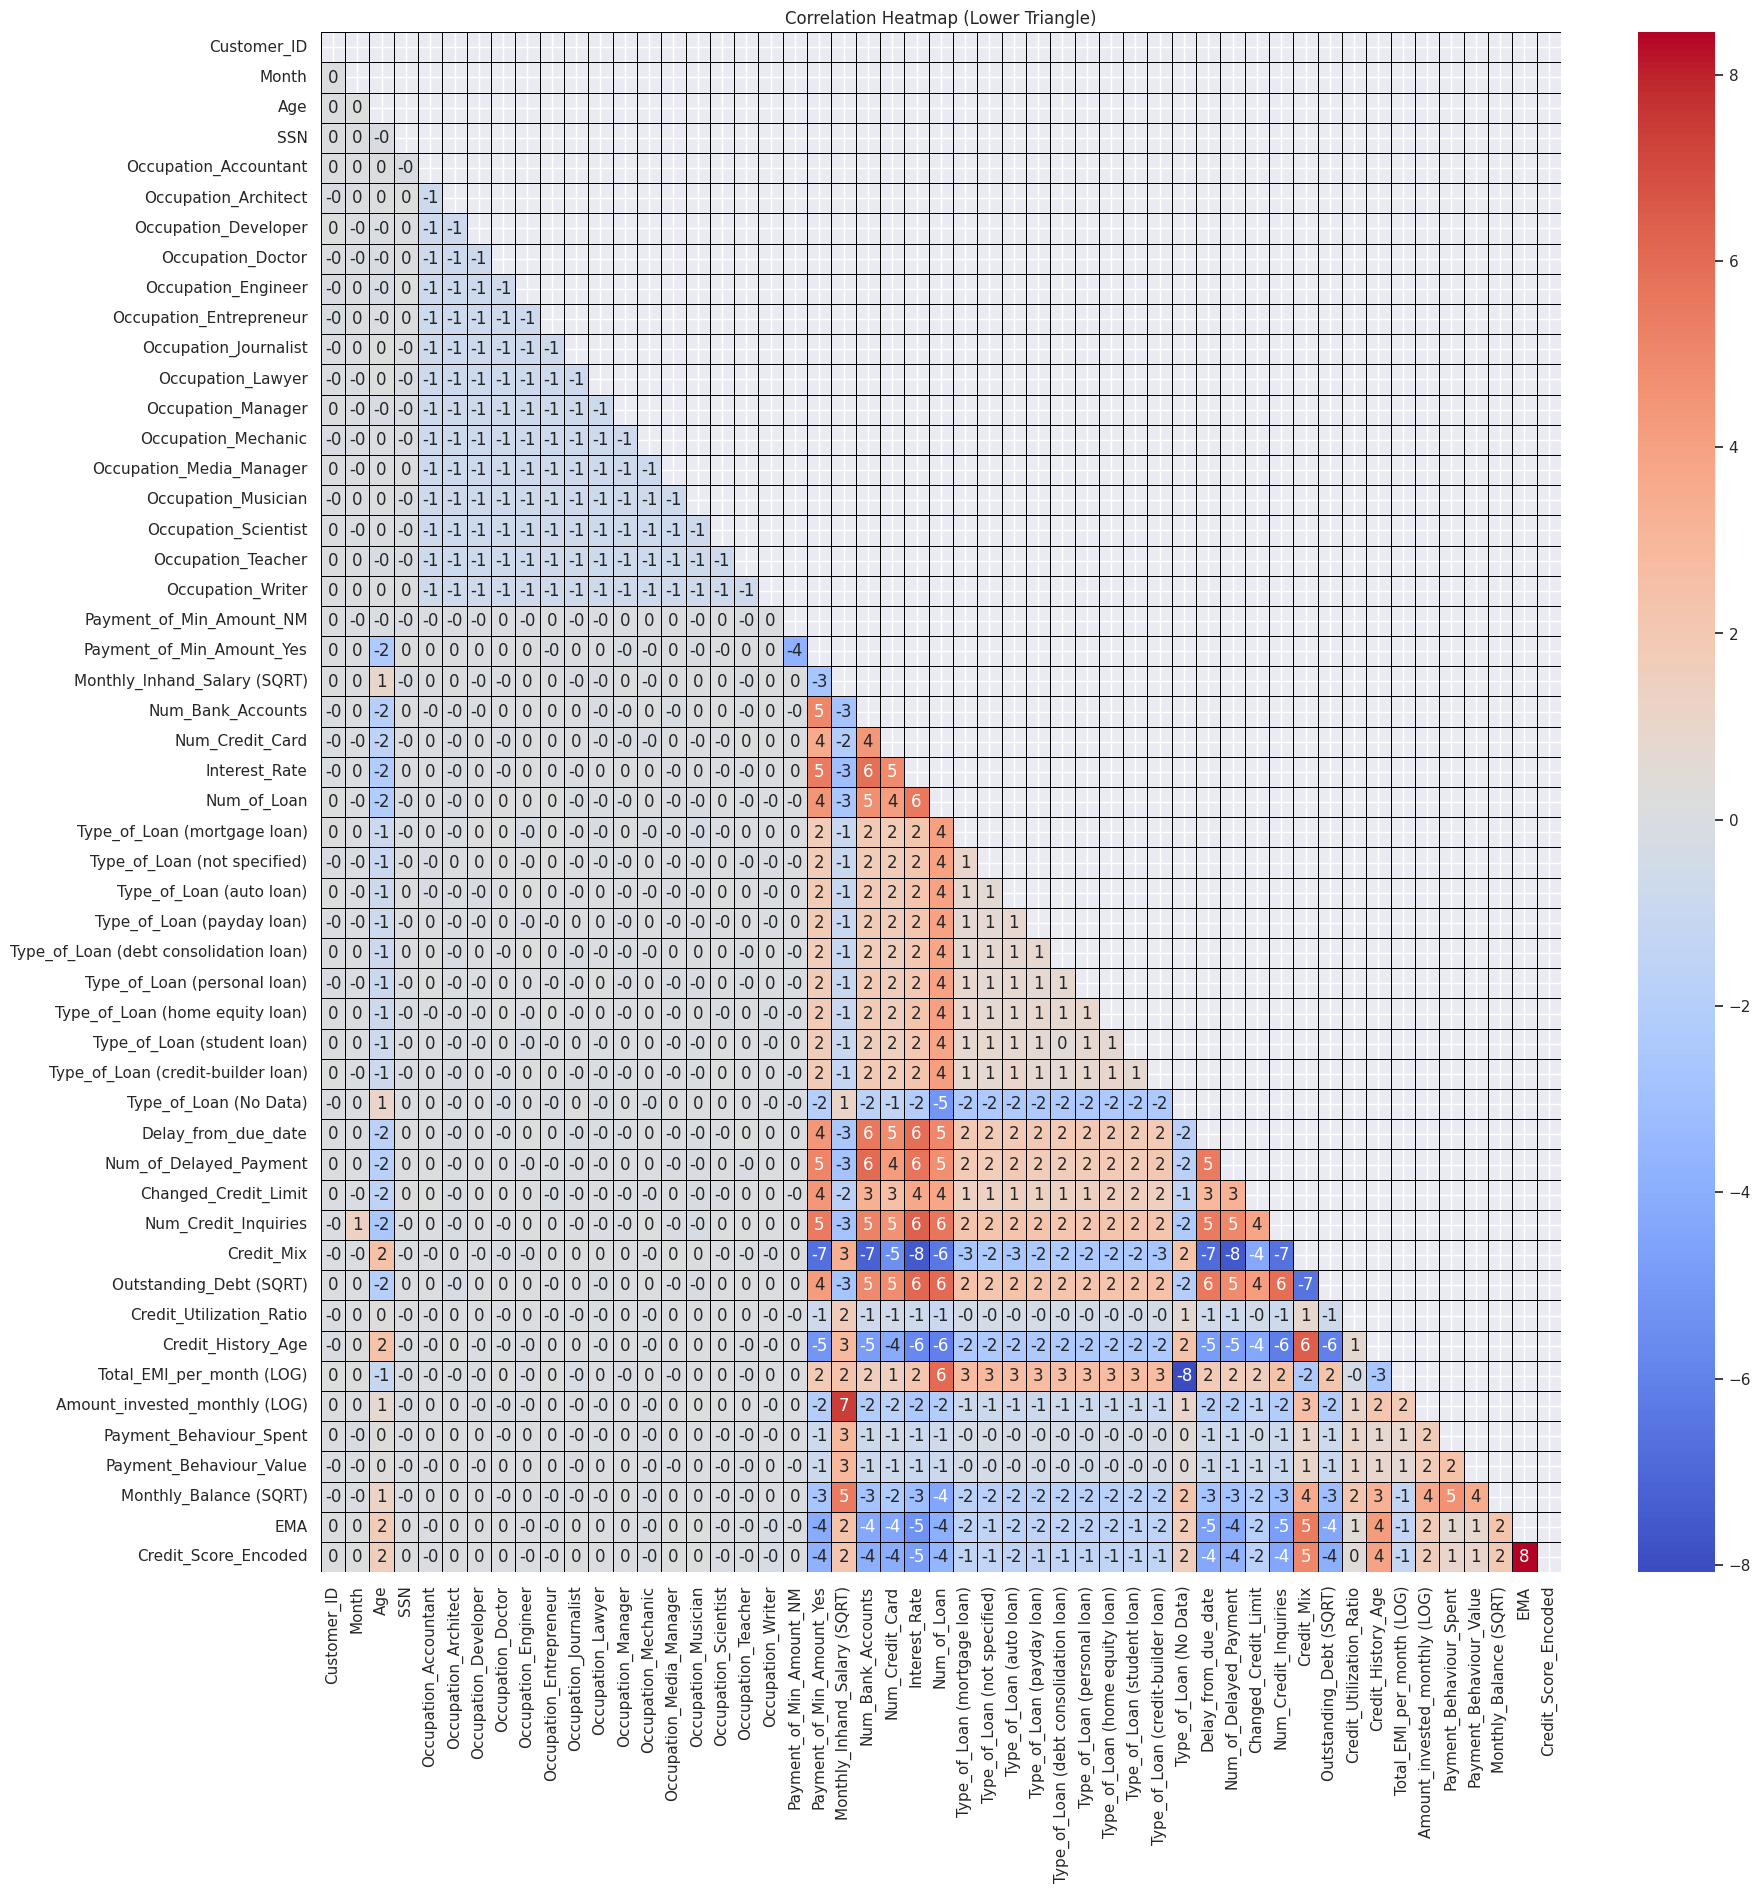

In [ ]:
def compute_correlation(X_preprocessed, Y_preprocessed):

  # Add the 'Credit_Score' column to the numerical features DataFrame
  X_preprocessed_numerical_columns_only = pd.concat([X_preprocessed, Y_preprocessed], axis=1)

  # Compute the correlation matrix
  correlation_df = X_preprocessed_numerical_columns_only.corr()
  return correlation_df

def show_correlation(correlation_df):
  # Generate a mask for the upper triangle (including the diagonal)
  mask = np.triu(correlation_df)

  # Create a heatmap of the correlations
  plt.figure(figsize=(20, 20))
  sns.heatmap(correlation_df*10, mask=mask, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5, linecolor='black')
  plt.title("Correlation Heatmap (Lower Triangle)")
  plt.show()

correlation_df = compute_correlation(feature_engineer_X(X_preprocessed), feature_engineer_Y(Y_preprocessed))
show_correlation(correlation_df)

We would like to mention a few points:
- Here, we see that the new feature that we created seems VERY promising.
- Also, we can see that many features have coorelation 0 with our target variable. During the expirementationphase, we removed all those features and trained our models only with features that where cooralted to our target variable. Unfortunatelly, the models always underperfomed without them.
- Since our main objective is accuracy, we decided to keep all the features.
- If we wanted to compromise between perfomance and accuracy, we would most likely discard those features, since the training process without them is way quicker.

## Pipeline from X and Y to X_train, X_val, y_train, y_val
Now, let's just wrap everything we did into 3 functions:
- One function that takes X and applies preprocessing, feature selection and that transforms into np array
- One function that takes Y and applies preprocessing, feature selection and that transforms into np array
- One function that splits between train and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

def fully_preprocess_feature_engineer_X(X):

    X = X.copy()
    X_preprocessed = full_preprocess_X(X)

    X_feature_engineered = feature_engineer_X(X_preprocessed)

    X_feature_engineered = np.array(X_feature_engineered)#Yes, many machine learning libraries, including popular ones like scikit-learn and LightGBM, work well with NumPy arrays for training models. In fact, converting your features to NumPy arrays can often improve the efficiency of the training process. Most machine learning models in these libraries expect input data in the form of NumPy arrays or similar array-like structures.

    return X_feature_engineered

def fully_preprocess_feature_engineer_Y(Y, Y_encoding_type):

    Y = Y.copy()

    Y_preprocessed = full_preprocess_Y(Y, Y_encoding_type)

    Y_feature_engineered = feature_engineer_Y(Y_preprocessed)

    Y_feature_engineered = np.array(Y_feature_engineered) #Yes, many machine learning libraries, including popular ones like scikit-learn and LightGBM, work well with NumPy arrays for training models. In fact, converting your features to NumPy arrays can often improve the efficiency of the training process. Most machine learning models in these libraries expect input data in the form of NumPy arrays or similar array-like structures.

    return Y_feature_engineered

def split_train_val(X_feature_engineered, Y_feature_engineered):

    X_train, X_val, y_train, y_val = train_test_split(X_feature_engineered, Y_feature_engineered, test_size=0.2)

    return X_train, X_val, y_train, y_val

And create the final sets:

In [ ]:
X_feature_engineered = fully_preprocess_feature_engineer_X(X)
Y_feature_engineered = fully_preprocess_feature_engineer_Y(Y, "ordinal_label")

X_train, X_val, y_train, y_val = split_train_val(X_feature_engineered, Y_feature_engineered)

# Assert that we didn't do forget any non-numeric elements
assert np.issubdtype(X_train.dtype, np.number), "Array contains non-numeric elements."
assert np.issubdtype(y_train.dtype, np.number), "Array contains non-numeric elements."

## Note About The EMA Feature

While creating the EMA feature, we understood that the EMA had an enormous potential for high scores in the Kaggle competition.

Indeed, by using only the Exponential Centered Moving Average, we can each an accuracy level of 83.14% WITHOUT ANY ALGORITHM:


In [ ]:
test_set = pd.read_csv("test_set.csv")
X_test = fully_preprocess_feature_engineer_X(test_set)

#Only taking the EMA feature
predicted_df = pd.DataFrame({"Credit_Score": X_test[:, -1]}).fillna(1).round().astype(int)

# Map numerical values to categories
predicted_labels = {0: 'Poor', 1: 'Standard', 2: 'Good'}
test_set["Credit_Score"] = predicted_df["Credit_Score"].map(predicted_labels)

final_df = test_set[["ID", "Credit_Score"]]
final_df.to_csv('sandbox_submission.csv', index=False)

However, we are aware that beyond this exercise, in a real-word case, it would be strange to predict month 5 knowing that we know months before and after, so our algorithm might overfit to our current dataset and perform badly for new customers for which we don't have any data.

Hence, at the end of this notebook, we will show an example of how the algorithms perform without using this new feature.

**However, since the task at hand is to reach the best accuracy, we used this new feature.**


In addition, our method could still work if the train/test split was shuffled so that months 1 to 6 were in the train set, and we had to predit months 7 and 8 from the test set: instead of using a centered average, we would just just a normal exponential moving average, putting more emphasis on previous months.

# Models, Parameter Tunning, and Evaluation

In this section we are going to create, tune, and evaluate different classification models.

The structure that we are going to use across all of our models is:
- Randomized Grid Search Cross-Validation. In this case we use Randomized Grid Search since the gridsearch execution time tends to be extremely long for most of the models.
- Stratified K-Fold Cross Validation.
  - Instead of the normal cross-validation algorithm we will use Stratified CV.
  - We choose that since we are dealing with a classification problem and if we randomly split our data, we might get uneven distribution of labels. Stratified CV prevents that from happening.
- Evaluate and store the best performing parameters for each model.
- Create and train a new model using those parameters with the entire dataset.
- Submit our results to kaggle, and evaluate the results.


- Before we start, we are going to initialize some function that we are going to use often. This include:
  - Initialization of train_set_X and train_set_Y.
  - Preparation of test_set_X for submission.

  

In [ ]:
# Function that returns our whole train Dataset Preprocessed and Feature Engineered.
def train_set():
  X_feature_engineered = fully_preprocess_feature_engineer_X(X)
  Y_feature_engineered = fully_preprocess_feature_engineer_Y(Y, "ordinal_label")
  return X_feature_engineered, Y_feature_engineered

x_train, y_train = train_set()


- Then we define a function that takes as input a trained model and a file name, and creates a csv file with the prediction for the test set.

In [ ]:
# Bring the whole dataset
def submission_csv(name, model):
  test_set = pd.read_csv("test_set.csv")
  X_test = fully_preprocess_feature_engineer_X(test_set)
  predicted_values = model.predict(X_test)

  # Map numerical values to categories
  predicted_labels = {0: 'Poor', 1: 'Standard', 2: 'Good'}
  predicted_df = pd.DataFrame({"Credit_Score": predicted_values})
  predicted_df["Credit_Score"] = predicted_df["Credit_Score"].map(predicted_labels)
  final_df = pd.concat([test_set[["ID"]], predicted_df[["Credit_Score"]]], axis=1)

  output_filename = f"{name}_submission.csv"
  final_df.to_csv(output_filename, index=False)



- Having those function we are going to create our models. After a'lot of research we decided to go with the most promising one being:
  - Logistic Regression
  - Decision Trees
    - RandomForests
    - LightGBM
    - XGBoost
  - Neural Networks

- Also for clarity purposes, we will add the libraries that we are going to use here.

In [ ]:
!pip install xgboost

# The GridSearch and the Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# The models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

## Best Submission Reproduction
- If you want to reproduce our best result, please run the code below.
- We have that as our first execution cell for convenience.
- After that we have all the models we used and the code we used.

In [ ]:
## Best current params


best_params = {
    'learning_rate':0.05,
    'max_depth':12,
    'n_jobs':-1,
    'num_iterations':100,
    'num_leaves':48,
    'random_state':42,
    'reg_alpha':0.1,
    'reg_lambda':0,
    'objective': 'multiclass',
    'metric' : "multi_error", # Different method multi_logloss, multi_error
    'num_class':3,
    'boosting_type':'gbdt',
    'max_bin' : 512,
    }

# Train the best model in all of our data.
best_lgb_cl = lgb.LGBMClassifier(**best_params)
best_lgb_cl.fit(x_train, y_train)

# Best submission.
submission_csv("best", best_lgb_cl)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5819
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 50
[LightGBM] [Info] Start training from score -1.233009
[LightGBM] [Info] Start training from score -0.635418
[LightGBM] [Info] Start training from score -1.721088


## Model: Logistic regression
- A classic in machine learning classification, we decided to use logistic regression since it is one of the most interpretable methods, its fast to train, and it would give us a nice benchmark to start our model training journey.

- In the parameters we put <code>multinomial</code> since we are trying to predict 3 labels, and not two.
- Note that we don't not need to specify the exact number of classes since by using the multinomial approach, the model uses the OvR approach.
- We also account for regularizing our model, so we will add a regularization parameter to prevent our model from overfitting.
- Finally, since the training is fast, we use a exhaustive Grid Search.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Initialize the parameter grid.
param_grid = {
    'C': [0.01, 0.1, 0, 1, 10],  # Regularization parameter
}

# logistic regression model.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000) # lbfgs is the recommended solver for big data sets.

# Initialize GSCV and train model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', verbose =False)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=3000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 0, 1, 10]}, scoring='accuracy',
             verbose=False)

In [ ]:
# Find the best parameters and the best score achieved
print("Best Params: " + str(grid_search.best_params_))
print("Best score: " + str(grid_search.best_score_))

# Set the best perfoming parameters and trai with our whole dataset.
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000, **grid_search.best_params_)
log_reg.fit(x_train, y_train)

Best Params: {'C': 10}
Best score: 0.8282428571428572


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, max_iter=3000, multi_class='multinomial')

- Then we create the submission.

In [ ]:
submission_csv("Logistic", log_reg)

The result from the kaggle submission was: <b>0.8326</b>

- We can see that the test result is higher than the validation.
- This might be because the problem and features is to complex for a simple logistic regression to solve, and thus, we can not further improve the model.

## Decision Trees.
- Now we are going to try decision trees and from our understanding of the data, it should be the best classifier of our data.
- From now on we will use <code>RandomizedGridSearchCV</code>, since the runtime of the code tend to get very large.

## Model: Random Forest Classifier

An ensemble learning method combining multiple decision trees.
Each tree contributes a "vote" towards the final prediction.
Hyperparameter Tuning:

- min_samples_split: Varied to determine the optimal number of samples for node splitting, aiming to prevent overfitting.
- n_estimators and max_depth: Adjusted to strike a balance between performance and overfitting.
- Bootstrap Method: Initial best-performing model did not use bootstrap methods.
Research indicated bootstrapping usually enhances model performance.
Post-evaluation inclusion of bootstrapping led to a slight performance increase (0.001 improvement).

In [ ]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False
             ]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rfc = RandomForestClassifier(random_state=42,n_jobs=-1)
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions= random_grid, cv= cv,\
                            verbose= -1, random_state=0, n_iter = 15)
CV_rfc.fit(x_train, y_train)
print("Best Params: " + str(CV_rfc.best_params_))
print("Best score: " + str(CV_rfc.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Params: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 70, 'bootstrap': False}
Best score: 0.8545142857142857


<ipython-input-59-10f2b8aa76cc>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       n_estimators=800, n_jobs=-1, random_state=42)

In [ ]:
print("Best Params: " + str(CV_rfc.best_params_))
print("Best score: " + str(CV_rfc.best_score_))

Best Params: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 70, 'bootstrap': False}
Best score: 0.8545142857142857


<ipython-input-60-16e48dafa45b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       n_estimators=800, n_jobs=-1, random_state=42)

In [ ]:
Best_Params= {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 70, 'bootstrap': True}

In [ ]:
rfc = RandomForestClassifier(random_state=42,n_jobs=-1,**Best_Params)
rfc.fit(x_train, y_train)

<ipython-input-56-dfef19b8097d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier(max_depth=70, min_samples_leaf=2, n_estimators=800,
                       n_jobs=-1, random_state=42)

In [ ]:
submission_csv("Random_Forests", rfc)

The result from the kaggle submission was: <b>85.47%</b>


## Model XGBOOST

An advanced implementation of the gradient boosting algorithm.
- Boosting Method: Contrary to Random Forests, XGBoost builds one tree at a time. Each subsequent tree corrects the mistakes of its predecessor.

- Model Configuration for Multiclass Problem: Set the objective to 'multi:softmax'. Defined the number of classes as 3.

- Hyperparameter Adjustment:Employed small learning rates with high numbers of estimators for accuracy improvement.
- Introduced L1 and L2 regularization to prevent overfitting.
- Observations on Regularization: Better performance with high L2 and low L1 regularization.
- This could be due to the high significance of a new feature, balanced out by L2 regularization.

In [ ]:
!pip install xgboost

In [ ]:
# Initialize the parameter grid.

# Here we do not specify the evaluation metric since it is already
xgboost_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2]
}

# XGBoost model for classification with 3 classes.
model = XGBClassifier(objective = 'multi:softmax', num_class=3, random_state=0, n_jobs=-1)

# Initialize GSCV and train model
grid_search = RandomizedSearchCV(estimator=model, param_distributions= xgboost_param_grid, cv= cv,\
                                 verbose= -1, random_state=0, n_iter = 40)
grid_search.fit(x_train, y_train)

# Find the best parameters and the best score achieved
print("Best Params: " + str(grid_search.best_params_))
print("Best score: " + str(grid_search.best_score_))

Best Params: {'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2}
Best score: 0.8594999999999999


In [ ]:
best_params = {'reg_lambda': 1.5,
              'reg_alpha': 0,
              'n_estimators': 1000, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2}
# Set the best perfoming parameters and trai with our whole dataset.
xgb = XGBClassifier(objective = 'multi:softmax', num_class=3, random_state=0, **grid_search.best_params_)
xgb.fit(x_train, y_train)

Best Params: {'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2}
Best score: 0.8594999999999999


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
submission_csv("XGB", xgb)

The result from the kaggle submission was: <b>85.7%</b>


## Model: LightGBM
A robust and efficient implementation of gradient boosting.

- Boosting Method Comparison: Tested 'Dart' and 'gbdt'. Found 'gbdt' more efficient and effective than 'Dart', which was slower and less accurate.

- Metric Evaluation for Multiclass Problem: Compared multilogloss and multi_error. Multi_error consistently outperformed multilogloss across all hyperparameter tuning experiments.

- Hyperparameter Strategy:

    - Started with a high learning rate and fewer iterations to speed up initial experiments.
    - Added a stopping round parameter at 10% of total iterations to reduce training time.
    - To mitigate overfitting, incorporated regularization parameters, notably L2 regularization.
    - Performance Insights: LightGBM outshined other models in terms of accuracy and training speed, making it a preferred choice for our needs.

In [ ]:
# Hyper parameter tips when using LightGBM
# https://neptune.ai/blog/lightgbm-parameters-guide
# Also very useful video https://www.youtube.com/watch?v=TvB_3jVIHhg

# 1) The num_leaves = 2^max_depth
# 2) Num_iterations (Also called num_boost_round), specifies the number of boosting trees to build. Always start small and steadily go up.
#    Also it is recommended to use SMALL learning_rate with BIG num_iterations.
# 3) Use early_stopping_rounds to stop your model when it is not sagnificantly learning.
#    Rule of thumb: 10% of the numbers of iterations.
# 4) For categorical values, we need to do a special type of pre-processing.
# 5) Method for the metric include (For classification problems) : AUC, multilogloss, multi_error
# 6) boosting_type include 3 types: gbdt, dart, goss

params = {
    'learning_rate': [0.05,0.1,0.05],
    "max_depth": [12 ,18,24],
    "num_leaves": [40, 48, 60],
    'reg_alpha': [0,0.1],
    'reg_lambda': [0, 0.1],
    'num_iterations': [100,300,500]
    }

params_fixed ={
    'objective': 'multiclass',
    'metric' : "multi_error", # Different method multi_logloss, multi_error
    'num_class':3,
    'boosting_type':'gbdt',
    'max_bin' : 512,
    'random_state':1
    }


In [ ]:
# The follwing procudure follows the steps of this site
# https://www.geeksforgeeks.org/cross-validation-and-hyperparameter-tuning-of-lightgbm-model/

#Create our model. In this case it is a LightGDM Classifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Initialize our model
lgb_cl = lgb.LGBMClassifier(**params_fixed, n_jobs=-1)

# Initialize our GridSearchCV for hyperparameters
gs = RandomizedSearchCV(estimator=lgb_cl, param_distributions= params, cv=cv, \
                        random_state=0, scoring='accuracy', n_jobs=-1, verbose=-1,n_iter = 30)

# In the fit, we give the evaluation set
gs.fit(x_train, y_train)


print("Best Params: " + str(gs.best_params_))
print("Best score: " + str(gs.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5819
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 50
[LightGBM] [Info] Start training from score -1.233009
[LightGBM] [Info] Start training from score -0.635418
[LightGBM] [Info] Start training from score -1.721088
Best Params: {'reg_lambda': 0, 'reg_alpha': 0.1, 'num_leaves': 48, 'num_iterations': 100, 'max_depth': 12, 'learning_rate': 0.05}
Best score: 0.8614571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3102
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 50
[LightGBM] [Info] Start training from score -1.233009
[LightGBM] [Info] Start training from score -0.635418
[LightGBM] [Info] Start training from score -1.721088


LGBMClassifier(learning_rate=0.05, max_depth=12, n_jobs=-1, num_iterations=100,
               num_leaves=48, random_state=42, reg_alpha=0.1, reg_lambda=0)

In [ ]:

params_fixed ={
    'objective': 'multiclass',
    'metric' : "multi_error", # Different method multi_logloss, multi_error
    'num_class':3,
    'boosting_type':'gbdt',
    'max_bin' : 512,
    }

best_params_ = {
    'learning_rate':0.05,
    'max_depth':12,
    'n_jobs':-1,
    'num_iterations':100,
    'num_leaves':48,
    'random_state':42,
    'reg_alpha':0.1,
    'reg_lambda':0
    }

Dont forget to train with all the data first!

In [ ]:
# Set the best perfoming parameters and trai with our whole dataset.
best_light_gbm_model = lgb.LGBMClassifier(**params_fixed, **best_params_)
best_light_gbm_model.fit(x_train, y_train)
submission_csv("lightgbm", best_light_gbm_model)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5819
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 50
[LightGBM] [Info] Start training from score -1.233009
[LightGBM] [Info] Start training from score -0.635418
[LightGBM] [Info] Start training from score -1.721088


The result from the kaggle submission was: <b>86.54%</b>


## Model: Neural Network Regression

Now, let's move on to using Neural Networks.

As we said earlier, we expect the neural network to perform worse than decision trees as they might not be able to identify thresholds like the Decision Trees might.

We could have created new features in that way, but we thought that decision trees would capture these new features without the human bias introduced when adding a manual threshold.

### Training

Let's start by creating our neural network.

The function is very long to enable us to quickly test and compare multiple hyperparameters like the number of layers, number of neurons, and other hyperparameters.

As said in the label encoding section, we also tested 3 different types of output layers, one per type of encoding:


*   For the ordinal label (1, 2 or 3), we used a linear activation on 1 neuron with a mean_squared_error loss. It should hence output 1 real number, hopefully close to 1, 2 or 3
*   For the One Hot encoding ([0, 0, 1], etc), we used a softmax on 3 neurons, as for usual classification tasks.
* For the new special encoding ([0, 0], [0, 1], [1, 1]), we used 2 sigmoids, as to predict independent classes.

Something very interesting is that all 3 encodings led to very very similar results, as we will observe after.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import LambdaCallback, EarlyStopping, ModelCheckpoint
import time
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from keras.regularizers import l2

def train_nn_regression(X_train, X_val, y_train, y_val, size_of_model, epochs, batch_size, lambda_value, learning_rate, decay, Y_encoding_type):

    print(f'Training with size_of_model={size_of_model}, epochs={epochs}, batch_size={batch_size}, lambda_value={lambda_value}, learning_rate={learning_rate}, decay={decay}, Y_encoding_type={Y_encoding_type}...')

    # Build the neural network with L2 regularization
    model = Sequential()
    if size_of_model == "big":
      model.add(Dense(128, activation='relu', kernel_regularizer=l2(lambda_value), input_shape=(X_train.shape[1],)))
      model.add(BatchNormalization())
      model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
      model.add(BatchNormalization())
      model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
      model.add(BatchNormalization())
      model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
      model.add(BatchNormalization())
      model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
      model.add(BatchNormalization())
    elif size_of_model == "medium":
      model.add(Dense(128, activation='relu', kernel_regularizer=l2(lambda_value), input_shape=(X_train.shape[1],)))
      model.add(BatchNormalization())
      model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
      model.add(BatchNormalization())
      model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
      model.add(BatchNormalization())
    elif size_of_model == "small":
      model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value), input_shape=(X_train.shape[1],)))
    else:
      print("error size_of_model")
    #Neurons that every size has
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(BatchNormalization())

    optimizer = Adam(learning_rate=learning_rate)

    # Last layer & compiling
    if Y_encoding_type == "ordinal_label":
      model.add(Dense(1, activation='linear'))
      model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    elif Y_encoding_type == "ordinal_hot":
      model.add(Dense(2, activation='sigmoid'))
      model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    elif Y_encoding_type == "one_hot":
      model.add(Dense(3, activation='softmax'))
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    else:
      print("encoding error")

    #Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

    # Decay or not
    if decay:
      learning_rate = ExponentialDecay(
          initial_learning_rate=learning_rate,
          decay_steps=1000,
          decay_rate=0.9)

    # Train the model
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint], verbose=0)
    end_time = time.time()
    duration = end_time - start_time
    duration_min = duration / 60
    print(f"Training duration: {duration_min:.2f} minutes")

    # Short learning curve
    plt.figure(figsize=(8, 4))

    plt.plot(history.history['loss'], label='Train')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()
    return model, history, duration_min

### Evaluation

Now, we need a way to evaluate the accuracy of our model.

To this end, we created a function that converts the output of the model (for each type of encoding) back to [0, 1 and 2].

We then created a function that shows the accuracy of the model on train and validation data.

In [ ]:
#Evaluate
from sklearn.metrics import accuracy_score

def predict_numbers(X, model, Y_encoding_type):
  # Make the predictions, that can be any real number
  numbers_predicted = model.predict(X, verbose=0)

  if Y_encoding_type == "ordinal_label":
    # Convert to 0, 1, 2
    numbers_predicted[numbers_predicted < 0.5] = 0
    numbers_predicted[numbers_predicted > 1.5] = 2
    numbers_predicted[(numbers_predicted >= 0.5) & (numbers_predicted <= 1.5)] = 1

  elif Y_encoding_type == "ordinal_hot":
    # Round to 0 and 1
    numbers_predicted[numbers_predicted < 0.5] = 0
    numbers_predicted[numbers_predicted >= 0.5] = 1
    # Create a new array to hold the results
    result = np.zeros(numbers_predicted.shape[0])
    # Applying the condition
    result[np.all(numbers_predicted == [0, 0], axis=1)] = 0
    result[np.all(numbers_predicted == [1, 0], axis=1)] = 1
    result[np.all(numbers_predicted == [1, 1], axis=1)] = 2

  elif Y_encoding_type == "one_hot":
    # Round to 0 and 1
    numbers_predicted[numbers_predicted < 0.5] = 0
    numbers_predicted[numbers_predicted >= 0.5] = 1
    # Create a new array to hold the results
    result = np.zeros(numbers_predicted.shape[0])
    # Applying the condition
    result[np.all(numbers_predicted == [1, 0, 0], axis=1)] = 0
    result[np.all(numbers_predicted == [0, 1, 0], axis=1)] = 1
    result[np.all(numbers_predicted == [0, 0, 1], axis=1)] = 2

  else:
    print("encoding error")

  return numbers_predicted

def evaluate_nn_regression(X_train, X_val, y_train, y_val, model, Y_encoding_type):

    #Train
    numbers_predicted_from_train = predict_numbers(X_train, model, Y_encoding_type)
    true_categories_train = y_train.astype(int)

    # Calculate accuracy
    accuracy_train = accuracy_score(true_categories_train, numbers_predicted_from_train)
    print(f"Accuracy train: {accuracy_train*100:.2f}%")

    #Test
    numbers_predicted_from_test = predict_numbers(X_val, model, Y_encoding_type)
    true_categories_test = y_val.astype(int)

    # Calculate accuracy
    accuracy_test = accuracy_score(true_categories_test, numbers_predicted_from_test)
    print(f"Accuracy test: {accuracy_test*100:.2f}%")

    return accuracy_train, accuracy_test

### Execution

Finally, we wrap every function we created into one big pipeline, that enables us to compute model accuracy for multiple different hyperparameters.

In [ ]:
def full_pipeline(X, Y, Y_encoding_type, size_of_model, epochs, batch_size, lambda_value, learning_rate, decay):
    #Creating sets
    X_feature_engineered = fully_preprocess_feature_engineer_X(X)
    Y_feature_engineered = fully_preprocess_feature_engineer_Y(Y, "ordinal_label")

    X_train, X_val, y_train, y_val = split_train_val(X_feature_engineered, Y_feature_engineered)

    #Training
    model, history, duration = train_nn_regression(X_train, X_val, y_train, y_val, size_of_model=size_of_model, epochs=epochs, batch_size=batch_size, lambda_value=lambda_value, learning_rate=learning_rate, decay=decay, Y_encoding_type=Y_encoding_type)
    #Evaluating
    accuracy_train, accuracy_test = evaluate_nn_regression(X_train, X_val, y_train, y_val, model, Y_encoding_type=Y_encoding_type)
    return model, accuracy_train, accuracy_test, duration

### Hyperparameter tuning
#### Tests to see what affect the hyperparameters

We systematically evaluated various hyperparameters over a wide range of epochs, implementing an early stopping mechanism when the validation loss showed negligible reduction.

The hyperparameters examined included:
- model size (quantified by the number of hidden layers and neurons)
- learning rate
- learning rate decay
- batch size
- lambda coefficient for L2 regularization
- The type of encoding

Initially, a grid search methodology was employed for hyperparameter optimization. This approach, though comprehensive, proved to be computationally intensive. To mitigate this, we opted for a sequential hyperparameter tuning process. While simultaneous adjustment of all hyperparameters is theoretically ideal, we discovered that modifying them sequentially, while keeping others fixed, was still effective in enhancing model performance.

Below is our code computing the hyperparameter tuning. We commented it as it took us at least 7 hours to run, but we added the final summary in the markdown below.

In [ ]:
# # History DataFrame
# history = pd.DataFrame(columns=["Y_encoding_type", "size_of_model", "epochs", "batch_size", "lambda_value", "learning_rate", "decay", "accuracy_train", "accuracy_test", "duration"])

# # Default values
# default_Y_encoding_type = "ordinal_hot"
# default_epochs = 150
# default_batch_size = 64
# default_lambda_value = 0.0001
# default_learning_rate = 0.001
# default_decay = False
# default_size_of_model = "medium"

# #Test hyperparameter on every encoding
# for Y_encoding_type in ["one_hot", "ordinal_hot", "ordinal_label"]:

#   # Size of model
#   for size_of_model in ["big", "medium", "small"]:
#     epochs, batch_size, lambda_value, learning_rate, decay = default_epochs, default_batch_size, default_lambda_value, default_learning_rate, default_decay  # Reset to default values
#     _, accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, size_of_model, epochs, batch_size, lambda_value, learning_rate, decay)
#     new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "size_of_model": size_of_model, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "decay": decay, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
#     history = pd.concat([history, new_row], ignore_index=True)

#   # Decay
#   for decay in [True, False]:
#     size_of_model, epochs, batch_size, lambda_value, learning_rate = default_size_of_model, default_epochs, default_batch_size, default_lambda_value, default_learning_rate  # Reset to default values
#     _, accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, size_of_model, epochs, batch_size, lambda_value, learning_rate, decay)
#     new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "size_of_model": size_of_model, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "decay": decay, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
#     history = pd.concat([history, new_row], ignore_index=True)

#   # Test batch_size
#   for batch_size in [512, 256, 128, 64, 32]:
#     size_of_model, epochs, lambda_value, learning_rate, decay = default_size_of_model, default_epochs, default_lambda_value, default_learning_rate, default_decay  # Reset to default values
#     _, accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, size_of_model, epochs, batch_size, lambda_value, learning_rate, decay)
#     new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "size_of_model": size_of_model, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "decay": decay, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
#     history = pd.concat([history, new_row], ignore_index=True)

#   # Test learning_rate
#   for learning_rate in [0.0001, 0.001, 0.01]:
#     size_of_model, epochs, batch_size, lambda_value, decay = default_size_of_model, default_epochs, default_batch_size, default_lambda_value, default_decay  # Reset to default values
#     _, accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, size_of_model, epochs, batch_size, lambda_value, learning_rate, decay)
#     new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "size_of_model": size_of_model, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "decay": decay, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
#     history = pd.concat([history, new_row], ignore_index=True)

#   # Test lambda_value
#   for lambda_value in [0, 0.00001, 0.0001, 0.0003, 0.001]:
#     size_of_model, epochs, batch_size, learning_rate, decay = default_size_of_model, default_epochs, default_batch_size, default_learning_rate, default_decay  # Reset to default values
#     _, accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, size_of_model, epochs, batch_size, lambda_value, learning_rate, decay)
#     new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "size_of_model": size_of_model, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "decay": decay, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
#     history = pd.concat([history, new_row], ignore_index=True)

# # Display the DataFrame
# display(history)


From the results, for each hyperparameter, here is a summary of our tuning:

| Features tested | Results                                                     |
| -------------- | ----------------------------------------------------------------------------------------------------- |
| Size of model: | Layers of (128,64,64,32) neurons are always better than (64, 32) by a lot. Increasing more doesn't change that much.
| Decay:          | Seems to help a bit                                                          |
| Batch_size:     | 64 is always better                                                                                |
| Learning rate:  | 0.001 always better than 0.0001 and 0.01, but 0.0003 is to try                                       |
| Lambda:        | 0 is nearly always better |
| Model:          | Ordinal_hot seems to be slightly bit better than the others                         |


If we want to dive into the raw results of all the testings, here they are:

|    | Y_encoding_type | size_of_model | epochs | batch_size | lambda_value | learning_rate | decay | accuracy_train | accuracy_test | duration of training (minutes) |
| -- | --------------- | ------------- | ------ | ---------- | ------------ | ------------- | ----- | -------------- | ------------- | -------- |
| 0  | one_hot         | big           | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.847286       | 0.759929      | 2.761904 |
| 1  | one_hot         | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.85025        | 0.765571      | 2.466455 |
| 2  | one_hot         | small         | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.744375       | 0.6925        | 1.764934 |
| 3  | one_hot         | medium        | 150    | 64         | 0.0001       | 0.001         | TRUE  | 0.832732       | 0.751643      | 1.60109  |
| 4  | one_hot         | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.832839       | 0.746286      | 1.574647 |
| 5  | one_hot         | medium        | 150    | 512        | 0.0001       | 0.001         | FALSE | 0.811929       | 0.701714      | 0.366853 |
| 6  | one_hot         | medium        | 150    | 256        | 0.0001       | 0.001         | FALSE | 0.847893       | 0.731071      | 0.586336 |
| 7  | one_hot         | medium        | 150    | 128        | 0.0001       | 0.001         | FALSE | 0.855821       | 0.762429      | 1.169435 |
| 8  | one_hot         | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.850161       | 0.767429      | 2.429413 |
| 9  | one_hot         | medium        | 150    | 32         | 0.0001       | 0.001         | FALSE | 0.817089       | 0.754286      | 4.647506 |
| 10 | one_hot         | medium        | 150    | 64         | 0.0001       | 0.0001        | FALSE | 0.850232       | 0.735214      | 4.844748 |
| 11 | one_hot         | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.833375       | 0.757786      | 1.704824 |
| 12 | one_hot         | medium        | 150    | 64         | 0.0001       | 0.01          | FALSE | 0.650929       | 0.647643      | 0.980987 |
| 13 | one_hot         | medium        | 150    | 64         | 0            | 0.001         | FALSE | 0.8675         | 0.774643      | 2.781052 |
| 14 | one_hot         | medium        | 150    | 64         | 0.00001      | 0.001         | FALSE | 0.867125       | 0.766714      | 2.625738 |
| 15 | one_hot         | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.846089       | 0.749929      | 2.472605 |
| 16 | one_hot         | medium        | 150    | 64         | 0.0003       | 0.001         | FALSE | 0.830679       | 0.757857      | 2.398179 |
| 17 | one_hot         | medium        | 150    | 64         | 0.001        | 0.001         | FALSE | 0.763589       | 0.719214      | 1.741173 |
| 18 | ordinal_hot     | big           | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.846161       | 0.779214      | 4.167323 |
| 19 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.852375       | 0.779571      | 2.650148 |
| 20 | ordinal_hot     | small         | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.770411       | 0.729286      | 1.496766 |
| 21 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.001         | TRUE  | 0.8435         | 0.770857      | 2.313448 |
| 22 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.839089       | 0.768429      | 2.22083  |
| 23 | ordinal_hot     | medium        | 150    | 512        | 0.0001       | 0.001         | FALSE | 0.869268       | 0.753         | 0.576686 |
| 24 | ordinal_hot     | medium        | 150    | 256        | 0.0001       | 0.001         | FALSE | 0.868446       | 0.751214      | 0.765816 |
| 25 | ordinal_hot     | medium        | 150    | 128        | 0.0001       | 0.001         | FALSE | 0.857929       | 0.763143      | 1.07051  |
| 26 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.837768       | 0.767         | 2.242879 |
| 27 | ordinal_hot     | medium        | 150    | 32         | 0.0001       | 0.001         | FALSE | 0.810268       | 0.756214      | 5.151947 |
| 28 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.0001        | FALSE | 0.874589       | 0.7545        | 6.565851 |
| 29 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.842643       | 0.775714      | 2.310642 |
| 30 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.01          | FALSE | 0.699482       | 0.697714      | 2.079947 |
| 31 | ordinal_hot     | medium        | 150    | 64         | 0            | 0.001         | FALSE | 0.861982       | 0.772357      | 2.199678 |
| 32 | ordinal_hot     | medium        | 150    | 64         | 0.00001      | 0.001         | FALSE | 0.872661       | 0.773143      | 2.752458 |
| 33 | ordinal_hot     | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.846089       | 0.775071      | 2.463269 |
| 34 | ordinal_hot     | medium        | 150    | 64         | 0.0003       | 0.001         | FALSE | 0.802036       | 0.750429      | 1.942966 |
| 35 | ordinal_hot     | medium        | 150    | 64         | 0.001        | 0.001         | FALSE | 0.752946       | 0.727714      | 2.555815 |
| 36 | ordinal_label   | big           | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.842018       | 0.771357      | 4.699865 |
| 37 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.832286       | 0.772286      | 3.02058  |
| 38 | ordinal_label   | small         | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.757304       | 0.723143      | 1.507058 |
| 39 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.001         | TRUE  | 0.816196       | 0.756         | 2.41074  |
| 40 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.835054       | 0.760429      | 3.319059 |
| 41 | ordinal_label   | medium        | 150    | 512        | 0.0001       | 0.001         | FALSE | 0.880321       | 0.756429      | 1.119283 |
| 42 | ordinal_label   | medium        | 150    | 256        | 0.0001       | 0.001         | FALSE | 0.868464       | 0.760786      | 1.645244 |
| 43 | ordinal_label   | medium        | 150    | 128        | 0.0001       | 0.001         | FALSE | 0.842768       | 0.760714      | 1.538599 |
| 44 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.832554       | 0.768643      | 2.954761 |
| 45 | ordinal_label   | medium        | 150    | 32         | 0.0001       | 0.001         | FALSE | 0.793464       | 0.745571      | 4.653658 |
| 46 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.0001        | FALSE | 0.861893       | 0.759857      | 7.721858 |
| 47 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.838161       | 0.763786      | 3.590959 |
| 48 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.01          | FALSE | 0.681518       | 0.6735        | 2.16422  |
| 49 | ordinal_label   | medium        | 150    | 64         | 0            | 0.001         | FALSE | 0.854518       | 0.770571      | 2.591116 |
| 50 | ordinal_label   | medium        | 150    | 64         | 0.00001      | 0.001         | FALSE | 0.854714       | 0.774571      | 2.761847 |
| 51 | ordinal_label   | medium        | 150    | 64         | 0.0001       | 0.001         | FALSE | 0.828643       | 0.7695        | 3.202989 |
| 52 | ordinal_label   | medium        | 150    | 64         | 0.0003       | 0.001         | FALSE | 0.804554       | 0.7505        | 3.756815 |
| 53 | ordinal_label   | medium        | 150    | 64         | 0.001        | 0.001         | FALSE | 0.746946       | 0.716929      | 2.142394 |

#### Training final model with best hyperparameters we found

We will now train our final model witht the best hyperparameters that we found:

In [ ]:
model, accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type="ordinal_hot", size_of_model="medium", epochs=150, batch_size=64, lambda_value=0, learning_rate=0.0003, decay=True)

#### Understanding how well it does

We then generate a confusion matrix to show how good our model classifies:

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix():
  # Calculate the confusion matrix
  cm = confusion_matrix(true_categories_test, numbers_predicted_from_test)

  # Plotting the heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
  plt.title("Confusion Matrix")
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

### Generate submission

Finally, we will create the pipeline of the final submission:
- We start by creating a function that converts 0, 1 and 2 to the real categories

In [ ]:
def transform_back_to_categories(numbers_predicted):

  # Show how to convert back
  credit_score_mapping = {0: 'Poor', 1: 'Standard', 2: 'Good'}

  # Create a df
  numbers_predicted_flat = numbers_predicted.flatten()
  numbers_predicted_df = pd.DataFrame({'Credit_Score': numbers_predicted_flat})

  # Applying ordinal encoding
  categories_predicted = numbers_predicted_df['Credit_Score'].map(credit_score_mapping).to_frame('Credit_Score')

  return categories_predicted

- We then load our test csv to be sure it is not modified earlier

In [ ]:
def load_test_data():
    # Load the test data
    test_set_csv = pd.read_csv('test_set.csv')
    return test_set_csv

test_set_csv = load_test_data()

# Understand shape of data
print(f'Shape: {test_set_csv.shape}')

# Check for duplicates
num_duplicates = test_set_csv.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Check for missing values
num_missing = test_set_csv.isnull().sum().sum()
print(f'Number of missing values: {num_missing}')

- We preprocess the test csv

In [ ]:
def prepare_X_test_csv(test_set_csv):

  X_test_csv_prepared = test_set_csv.copy()

  X_test_csv_prepared = full_preprocess_X(X_test_csv_prepared)
  X_test_csv_prepared = feature_engineer_X(X_test_csv_prepared)

  return X_test_csv_prepared

- Predictions are made on the test set

In [ ]:
def predict_test_categories(X_test_csv_prepared):
  numbers_predicted = predict_numbers(X_test_csv_prepared)
  categories_predicted = transform_back_to_categories(numbers_predicted)
  return categories_predicted

- And finally, the csv is created

In [ ]:
def generate_submission():
    # DON'T FORGET TO TRAIN ON THE ENTIRE SET (TRAIN + CROSS VALIDATION), NOT JUST TRAIN SET
    test_set_csv = load_test_data()
    X_test_csv_prepared = prepare_X_test_csv(test_set_csv)
    predicted_test_categories = predict_test_categories(X_test_csv_prepared)
    final_df = pd.concat([test_set_csv["ID"], predicted_test_categories["Credit_Score"]], axis=1)
    final_df.to_csv('sandbox_submission.csv', index=False)

generate_submission()